>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# The seaborn.objects interface

`seaborn.objects` namespace는 v0.12부터 새롭게 도입된 plot생성을 위한 interface입니다. 
이 새로운 interface는 데이터 변환과 plot을 위한 클래스의 컬렉션으로 구성되어, 보다 일광성 있고 유연한 API를 제공합니다. 
기존의 seaborn function들과 달리, `seaborn.objects`를 통해 matplotlib까지 내려가지(drop-down) 않고서도 plot을 구체화하고 커스터마이징할 수 있습니다. 
(필요하다면 matplotlib에서의 수정도 가능합니다.)
<br></br>
* Note : 현재 object interface는 미완성 단계입니다. 대부분의 사용에 이상이 없을만큼 안정적이지만, 일부 feature가 빠지거나 다듬어지지 않았을 수 있습니다.

## 1. plot 지정 및 data 맵핑
Specifying a plot and mapping data

object interface는 아래와 같이 import 합니다.

In [1]:
import seaborn.objects as so

`seaborn.objects` namespace를 통해 모든 연관된 class에 접근할 수 있습니다. 
가장 중요한 것은 `Plot` 입니다. 
`Plot`객체를 인스턴스화 하고 method를 호출해서 plot을 지정하게 됩니다. 아래의 예시를 통해 살펴보겠습니다.

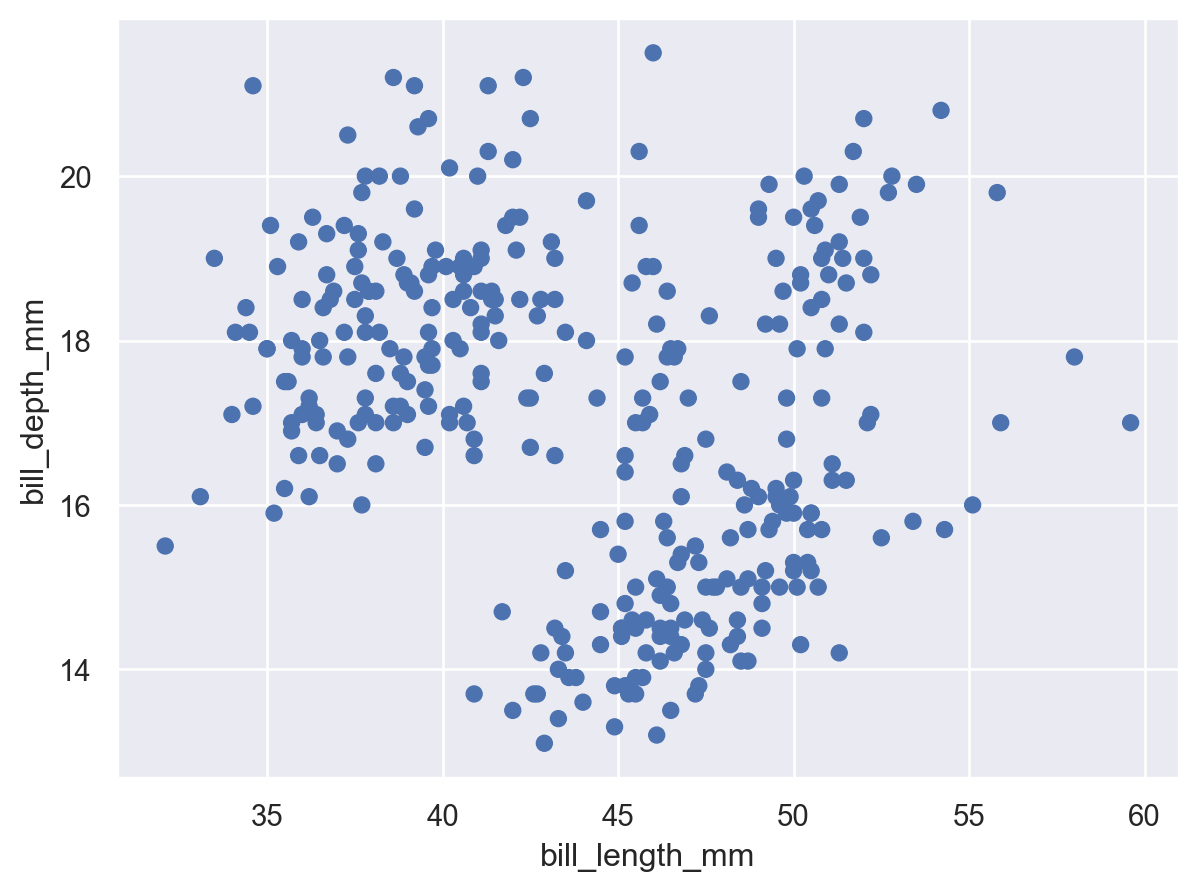

In [2]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
(
    so.Plot(penguins, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot())
)

이 코드는 우리에게 익숙한 scatter plot 생성했습니다. 
우리가 이전에 사용한 `seaborn.scatterplot()`과 마찬가지로, 여기서도 tidy dataframe(`penguins`)을 넘겨주고 2개의 컬럼을 plot의 `x`, `y` 좌표로 할당했습니다. 
다른 점은 이전에는 차트의 type을 먼저 정하고 data를 지정했다면, 이번에는 data를 먼저 지정하고 graphic 요소를 추가했습니다.

### 속성 설정하기
Setting properties  
<br>
위에서 사용한 `Dot` class 는 `Mark`(데이터 값을 그래픽으로 나타내는 객체) 중 하나입니다. 
각 mark마다 그 모양을 변경할 수 있는 속성(properties)을 가지고 있습니다.


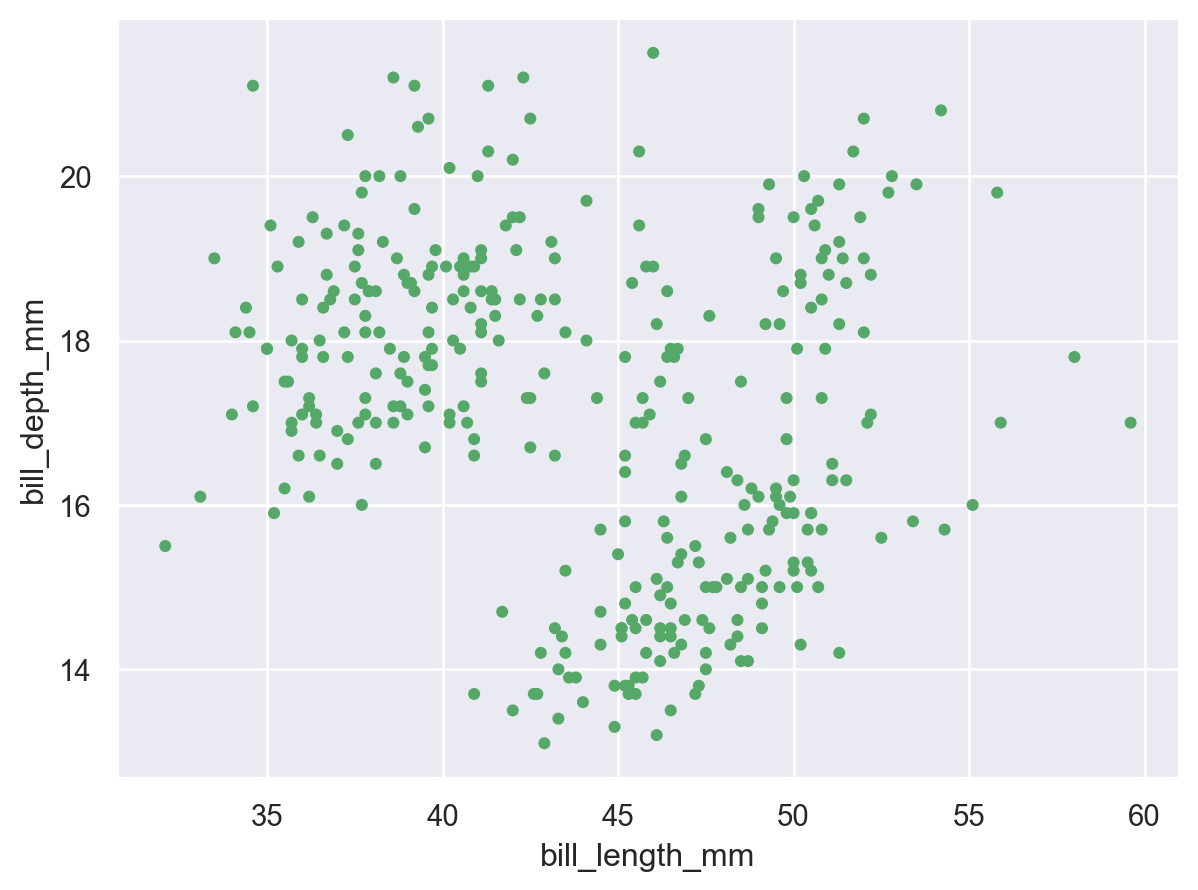

In [3]:
(
    so.Plot(penguins, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(color='g', pointsize=4))
)

### 속성 맵핑하기
Mapping properties

seaborn의 function과 마찬가지로, 데이터 값을 다양한 그래픽 속성(graphical properties)에 맵핑할 수 있습니다.

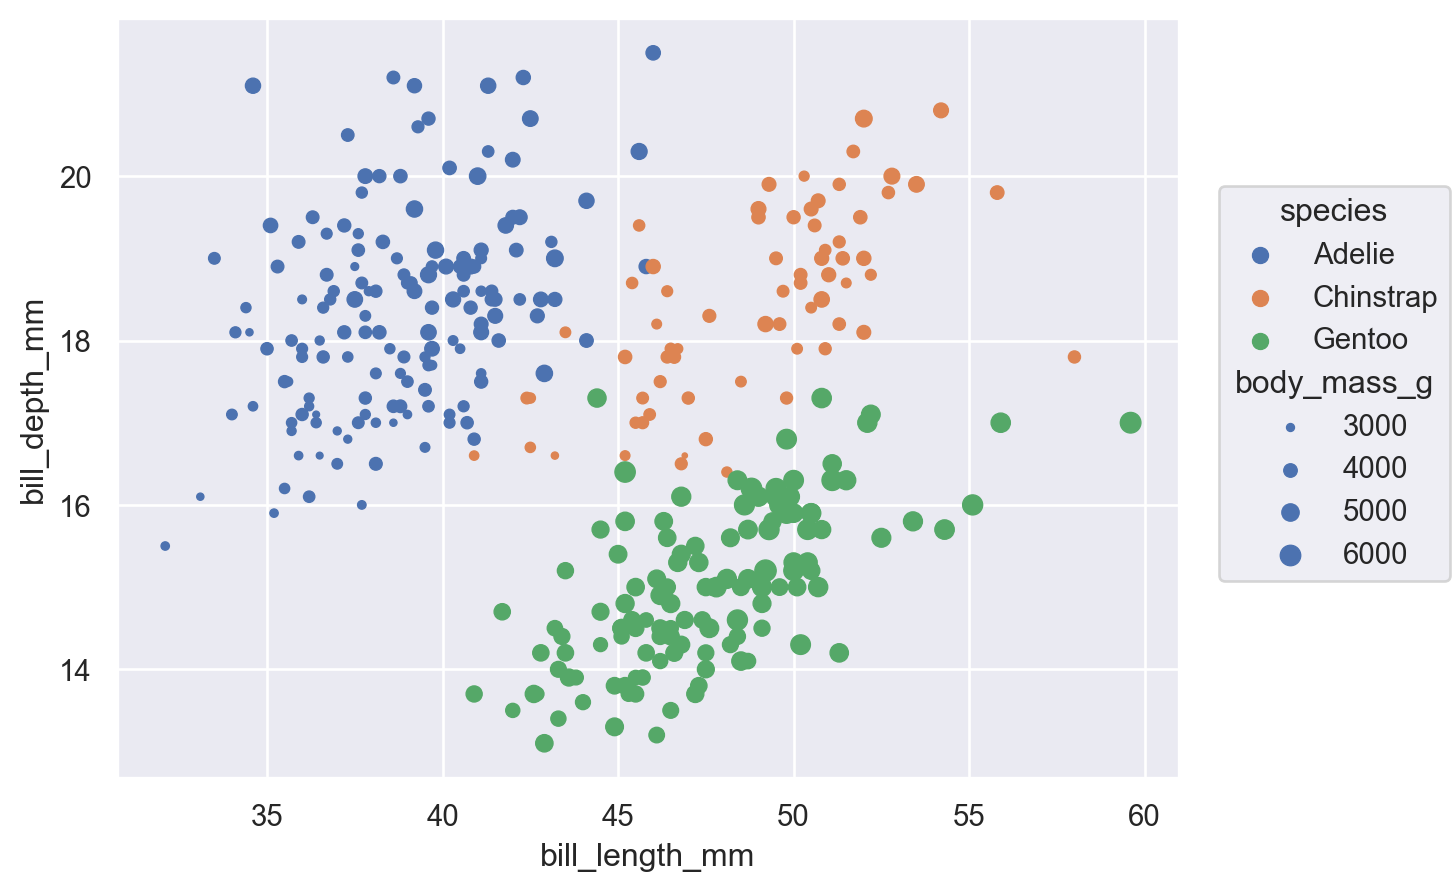

In [4]:
(
    so.Plot(
        penguins, x='bill_length_mm', y='bill_depth_mm',
        color='species', pointsize='body_mass_g')
    .add(so.Dot())
)

function API와의 주요 차이점은 매개변수(parameter)의 이름을 그대로 사용한다는 것입니다. 여기서 중요한 것은 속성이 "어디에" 정의됐는가 입니다 : `Dot`을 초기설정(initialize)할 때 value를 직접적으로 전달하는 반면, plot을 설정할 때는 
  
이런 차이점 외에도, objects interface는 여러가지 mark 속성의 맵핑이 가능하게 해줍니다:

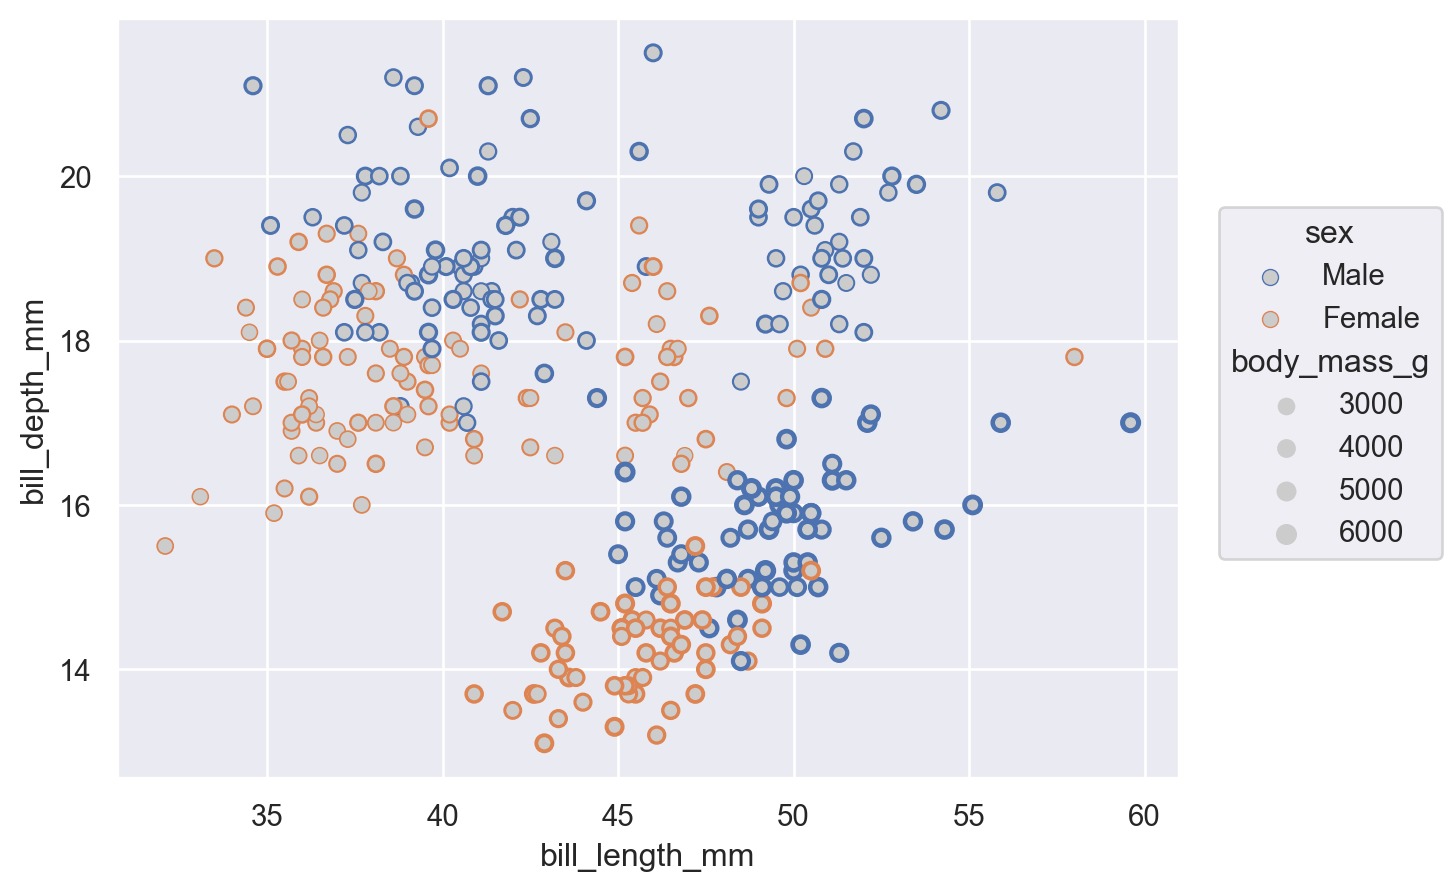

In [5]:
(
    so.Plot(
        penguins, x='bill_length_mm', y='bill_depth_mm',
        edgecolor='sex', edgewidth='body_mass_g'
    )
    .add(so.Dot(color='.8'))
)

### 그룹 정의하기
Defining groups

The Dot mark represents each data point independently, so the assignment of a variable to a property only has the effect of changing each dot’s appearance. For marks that group or connect observations, such as Line, it also determines the number of distinct graphical elements:

Dot mark는 각각의 데이터 point를 독립적으로 보여줍니다. 그래서 속성에 변수를 할당하면 각 점의 모양만 변경됩니다. 선(line)과 같이 관측치를 그룹화하거나 연결하는 mark도 있는데, 이 경우 그래픽 요소의 수도 함께 결정하게 됩니다.

In [6]:
healthexp = sns.load_dataset('healthexp')
healthexp.head(5)

Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9

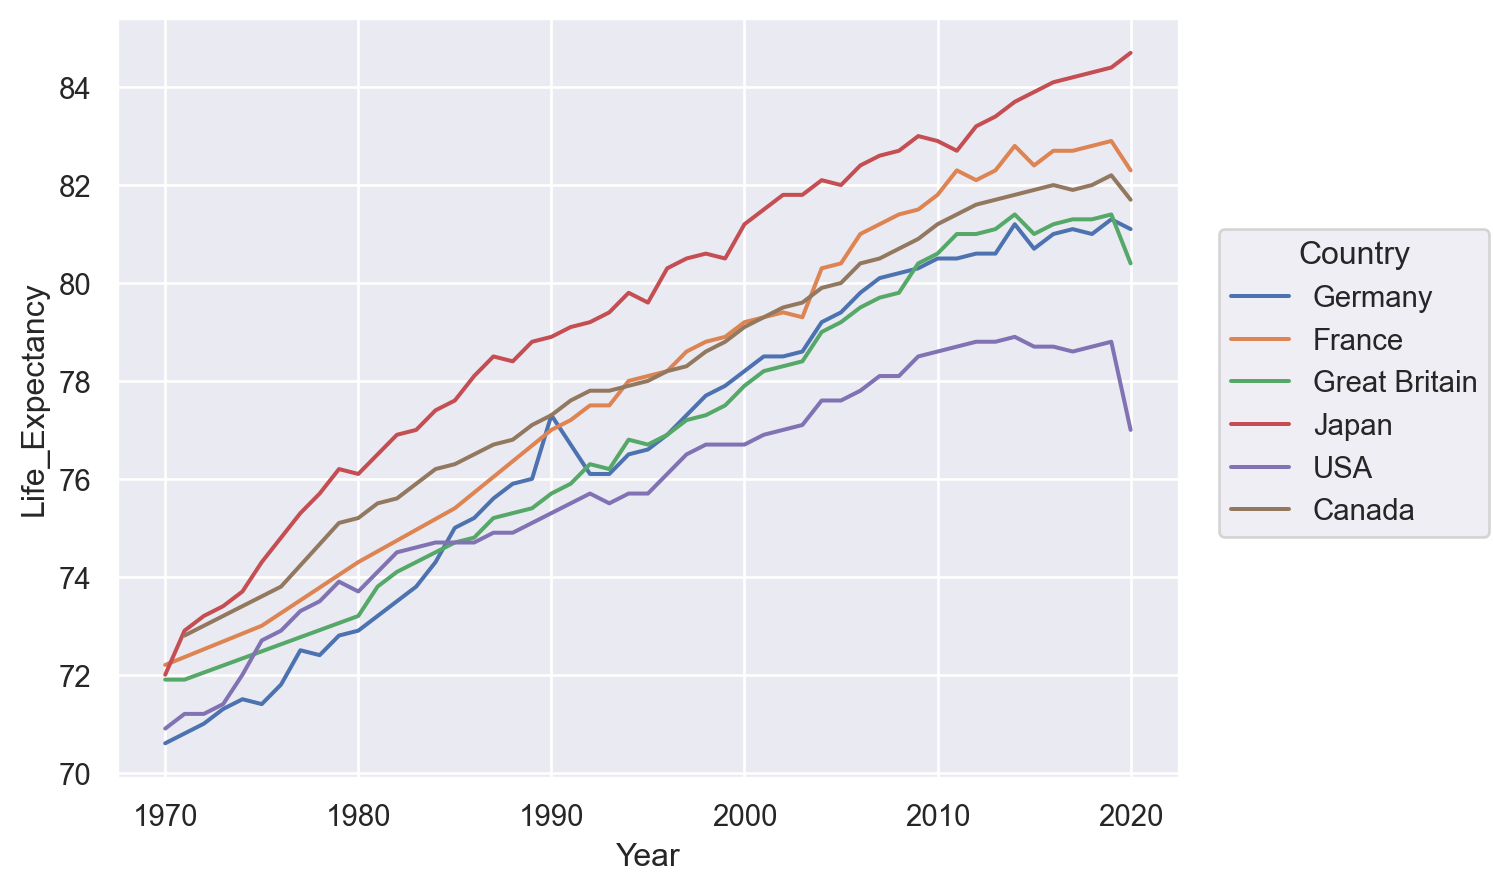

In [7]:
(
    so.Plot(healthexp, x='Year', y='Life_Expectancy', color='Country')
    .add(so.Line())
)

group을 사용해서 시각적 속성(visual properties)을 사용하지 않고도 그룹을 정의할 수 있습니다 :

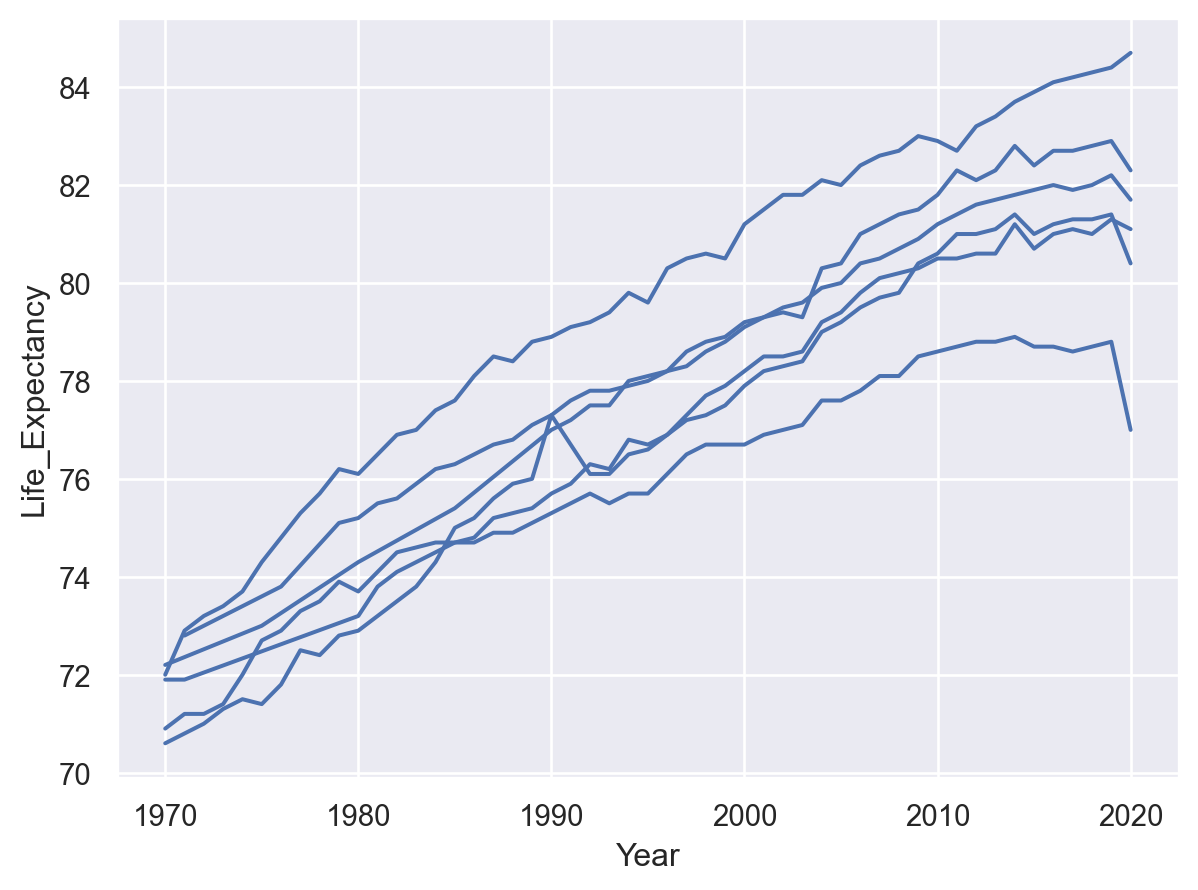

In [8]:
(
    so.Plot(healthexp, x='Year', y='Life_Expectancy', group='Country')
    .add(so.Line())
)

## 2. plot 하기 전 data 변환
Transforming data before plotting

### 통계적 변환
Statistical transformation

seaborn의 많은 function과 마찬가지로, object interface에서도 통계적 변환을 지원합니다. `Agg`와 같은 `Stat` object를 사용하면 됩니다.

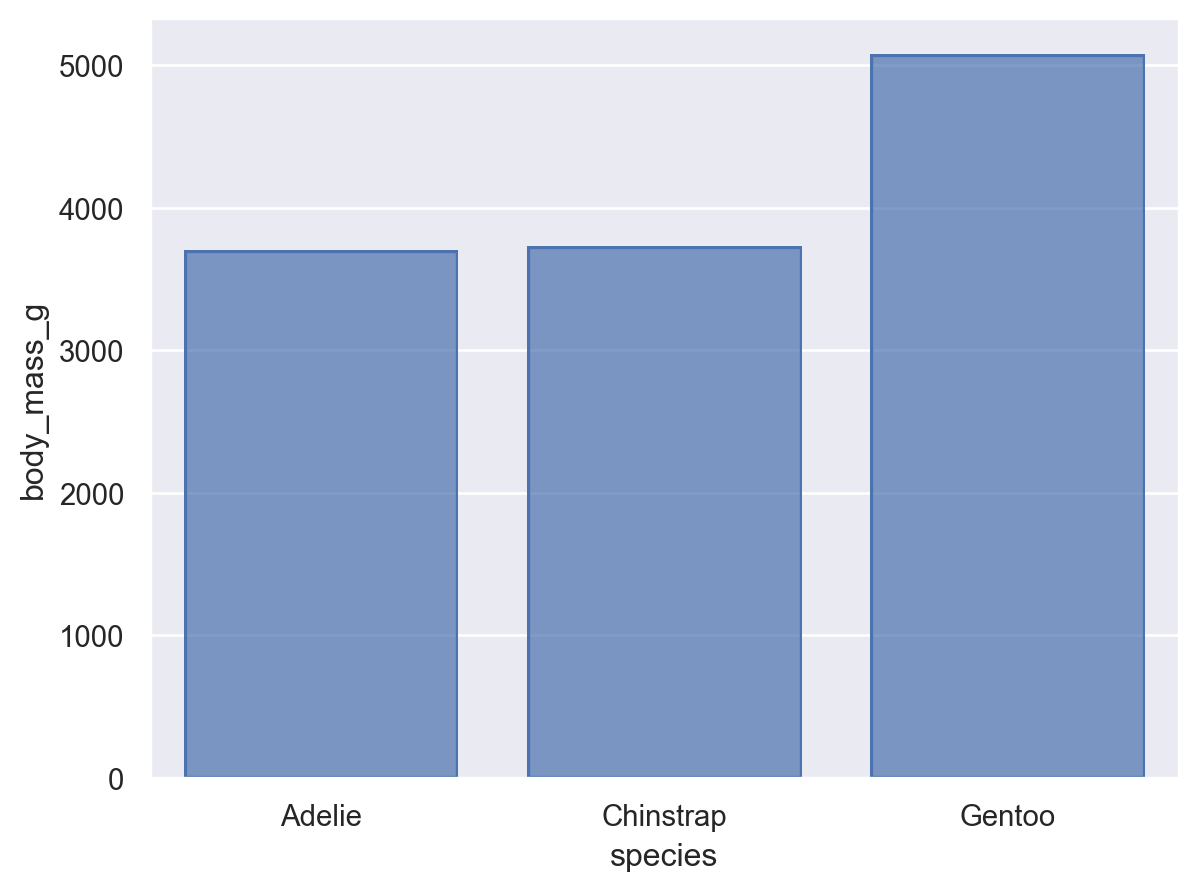

In [9]:
(
    so.Plot(penguins, x='species', y='body_mass_g')
    .add(so.Bar(), so.Agg())
)

In the function interface, statistical transformations are possible with some visual representations (e.g. `seaborn.barplot()`) but not others (e.g. `seaborn.scatterplot()`). The objects interface more cleanly separates representation and transformation, allowing you to compose Mark and Stat objects:

function interface에서는 통계적 변환이 일부 시각화에서만 가능합니다 (ex. seaborn.barplot() : 가능, seaborn.scatterplot() : 불가능).
object interface에서는 변환과 시각화를 좀 더 확실하게 구분해줘서 `Mark`와 `Stat`object를 구성할 수 있습니다.

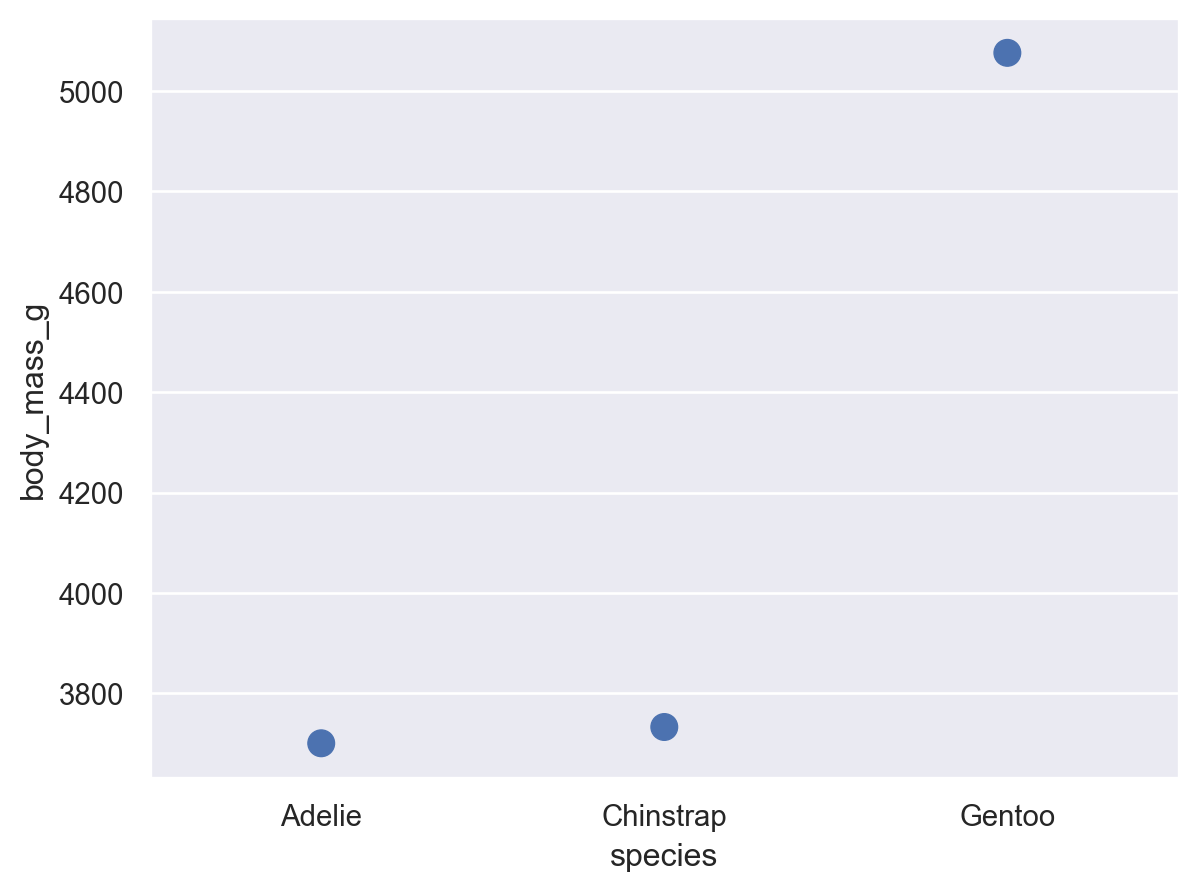

In [10]:
(
    so.Plot(penguins, x='species', y='body_mass_g')
    .add(so.Dot(pointsize=10), so.Agg())
)

맵핑 속성으로 그룹을 만들면, `Stat` 변환은 각 그룹마다 별도 적용됩니다.

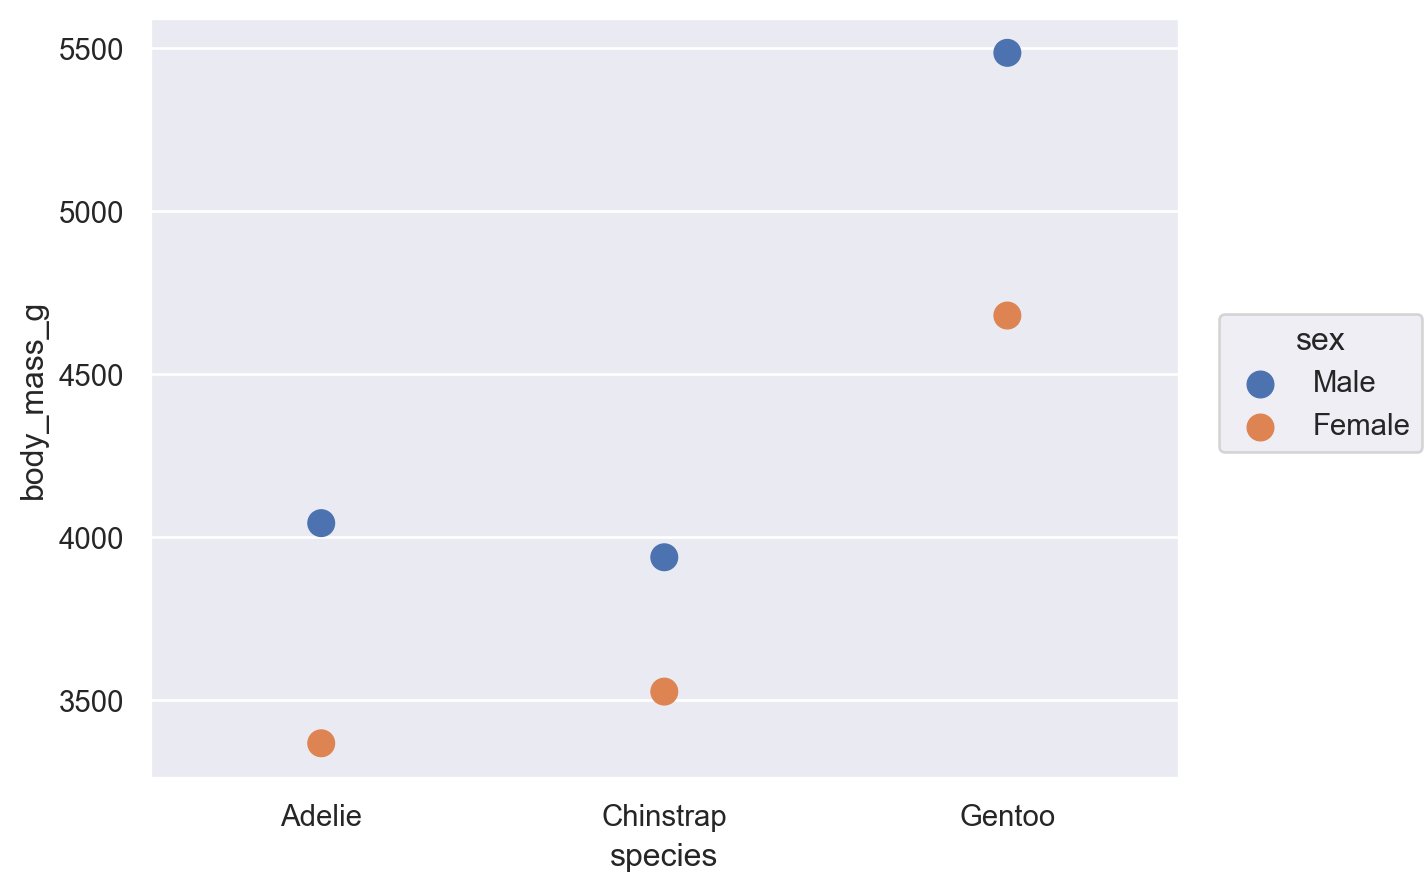

In [11]:
(
    so.Plot(penguins, x='species', y='body_mass_g', color='sex')
    .add(so.Dot(pointsize=10), so.Agg())
)

### overplot 분할하기
Resolving overplotting

seaborn의 function에도 `seaborn.barplot()` "dodges" bar에 `hue`지정처럼 자동으로 overplot을 분해하는 방법이 있습니다. objects interface는 더 간단한 default 동작이 있습니다. 여러개의 그룹이 포함된 bar는 자동으로 오버랩됩니다.

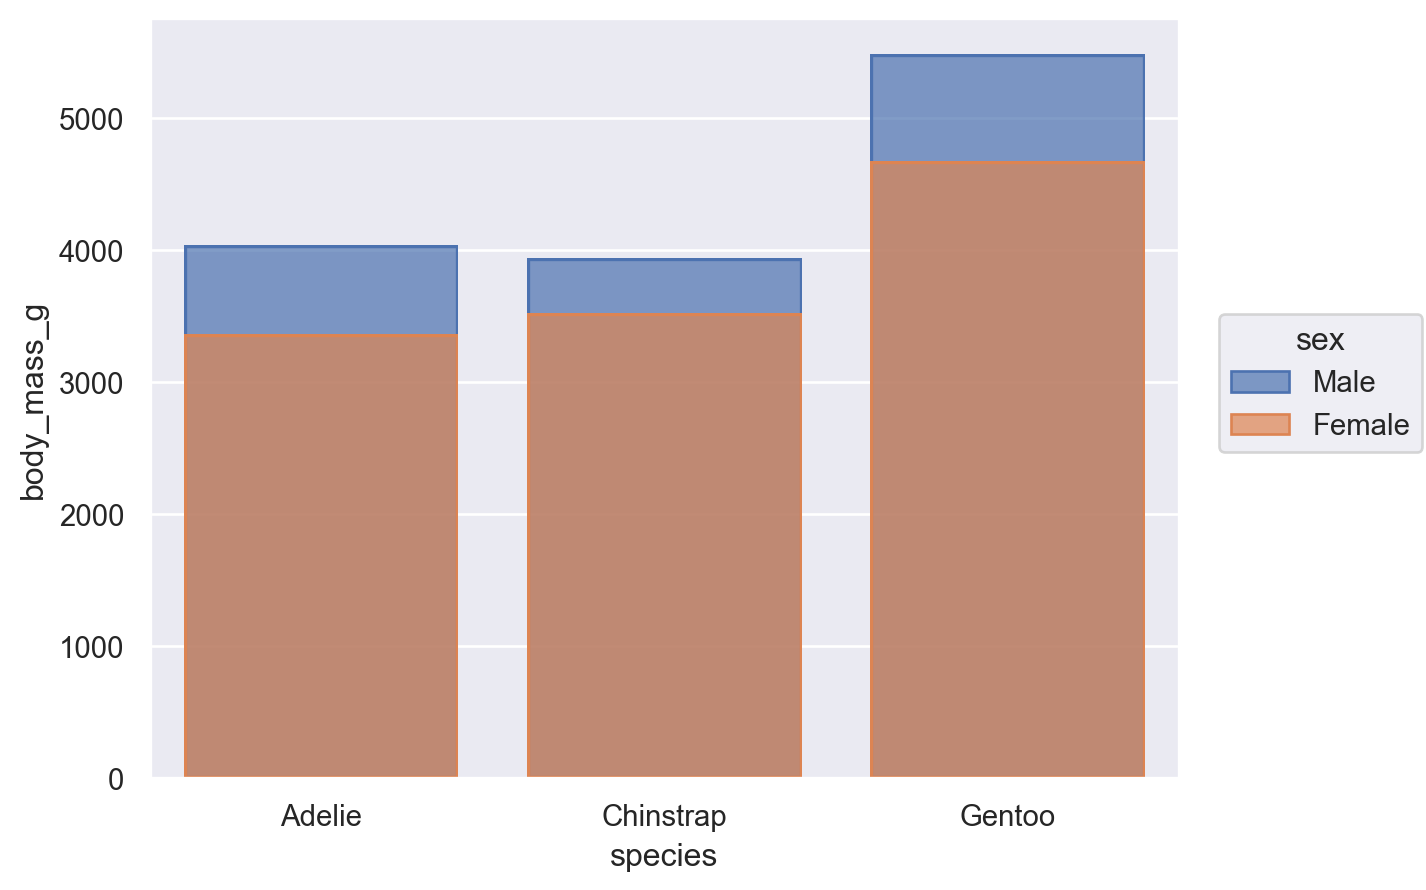

In [12]:
(
    so.Plot(penguins, x='species', y='body_mass_g', color='sex')
    .add(so.Bar(), so.Agg())
)

`Agg` stat으로 구성한 `Bar` mark에 `Dodge`를 적용해서 한번 더 변환할 수도 있습니다.

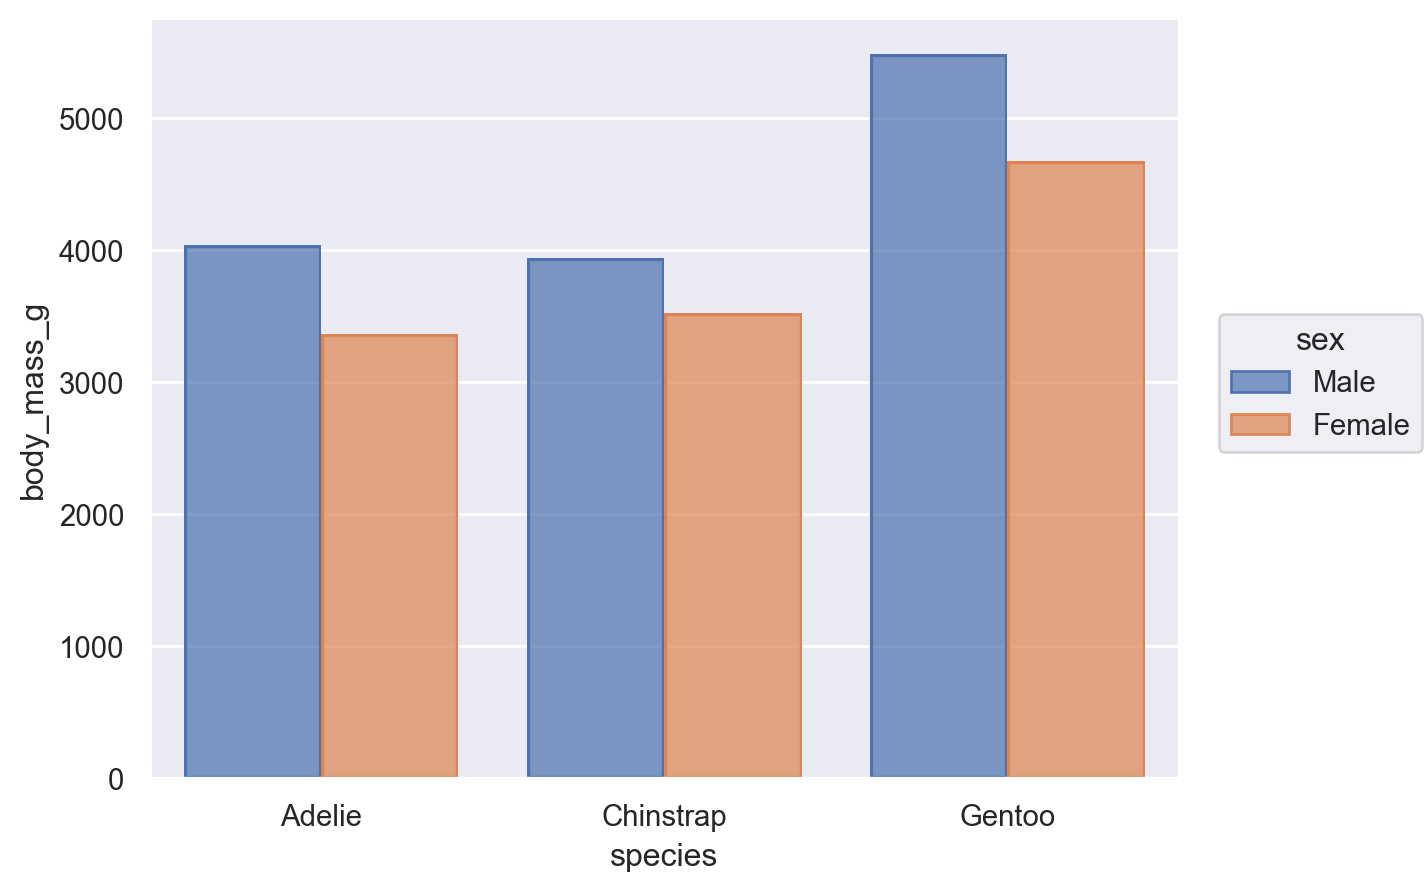

In [13]:
(
    so.Plot(penguins, x='species', y='body_mass_g', color='sex')
    .add(so.Bar(), so.Agg(), so.Dodge())
)

`Dodge` class 는 `Stat`과 유사하지만 `x`, `y` 좌표만을 수정하는 `Move` 변환 중 하나입니다.
`Move` class 는 `Stat`을 먼저 사용할 필요 없이 모든 mark에 적용 가능합니다 :

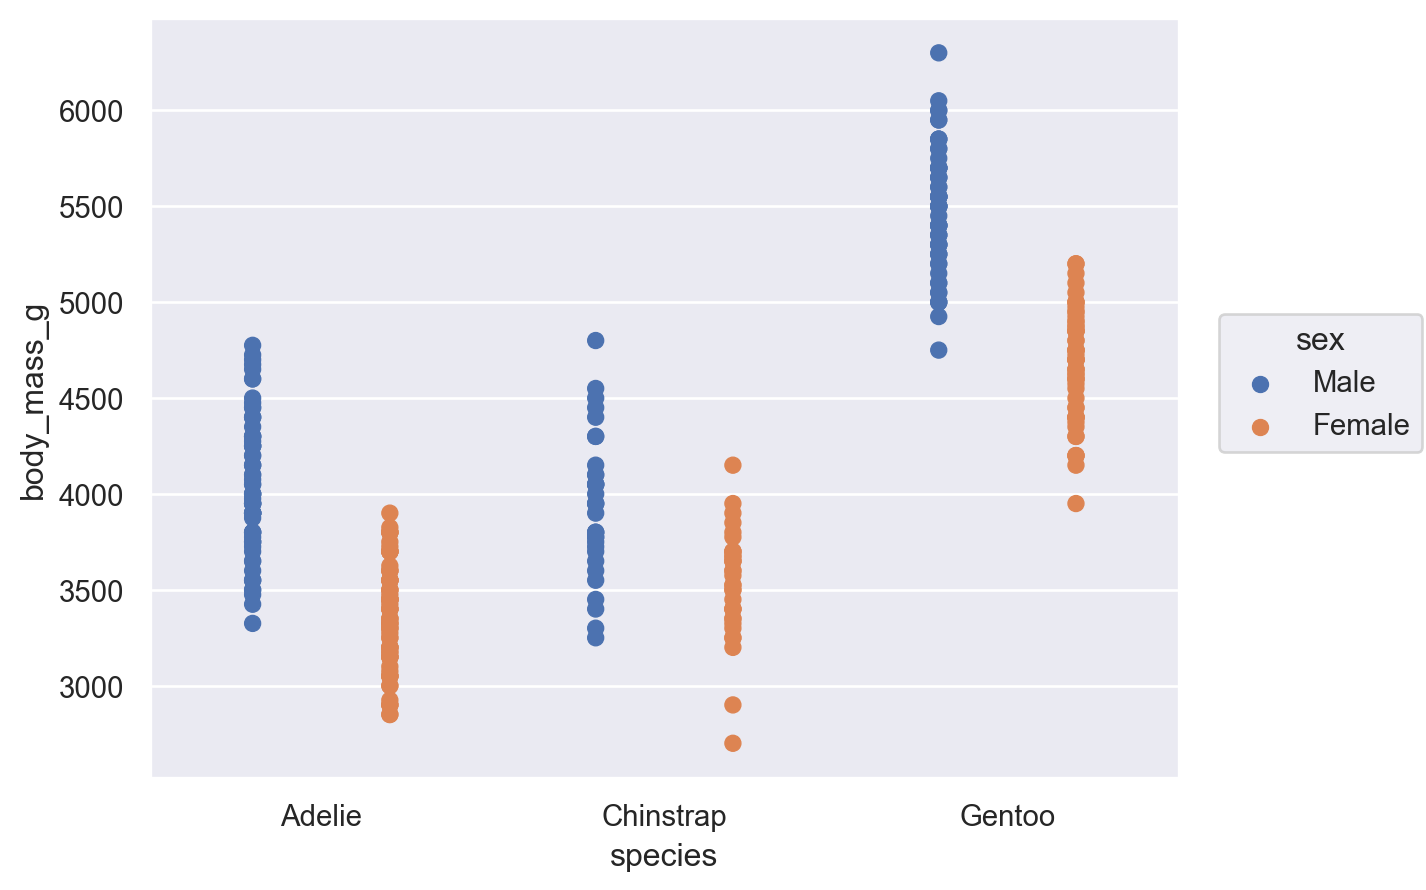

In [14]:
(
    so.Plot(penguins, x='species', y='body_mass_g', color='sex')
    .add(so.Dot(), so.Dodge())
)

sequence에 여러개의 `Move`operation을 적용할 수도 있습니다.

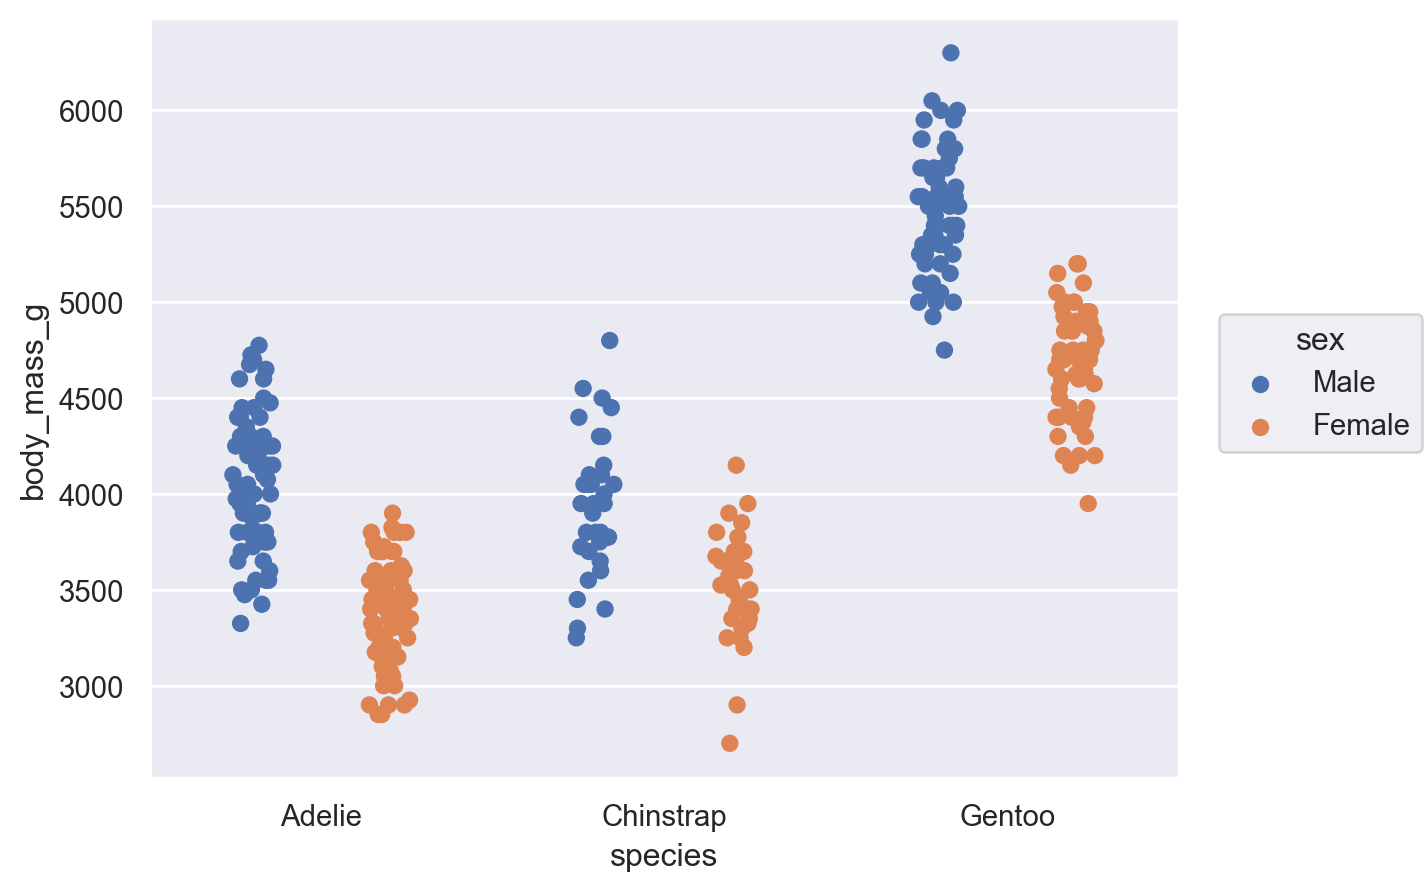

In [15]:
(
    so.Plot(penguins, x='species', y='body_mass_g', color='sex')
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

### 변환을 통해 변수 생성하기
Creating variables through transformation

`Agg` stat 을 사용하려면 `x`, `y` 가 먼저 정의되어 있어야 합니다. 하지만 변수는 통계 변환(statistical transformation)을 통해 생성할 수도 있습니다. 예를 들어, `Hist` stat 은 `x`, `y` 중 하나만 정의해 놓으면 다른 하나는 counting observation을 통해 다른 하나를 생성합니다.

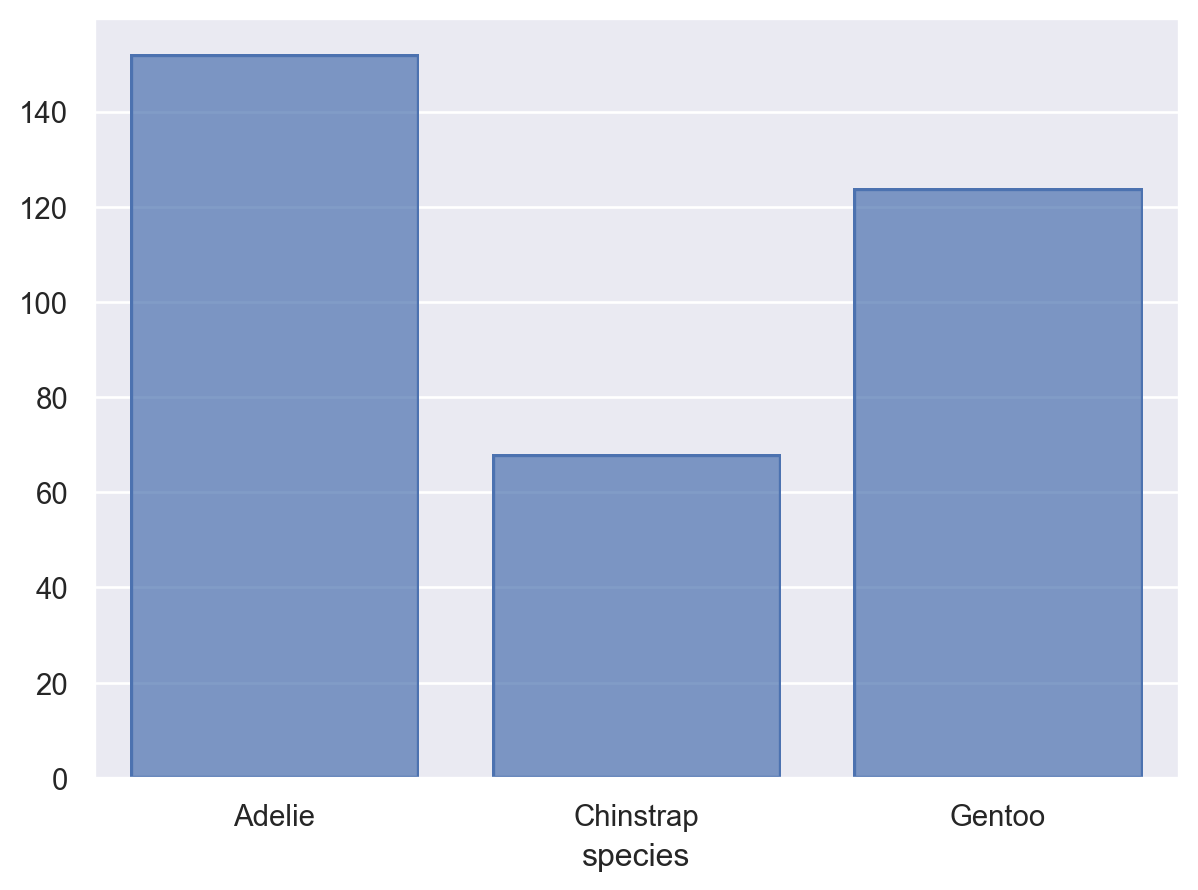

In [16]:
(
    so.Plot(penguins, x='species')
    .add(so.Bar(), so.Hist())
)

`Hist` stat 은 수치형 데이터를 구간화(binning)해서 새로운 `x` 값을 만들 수도 있습니다.

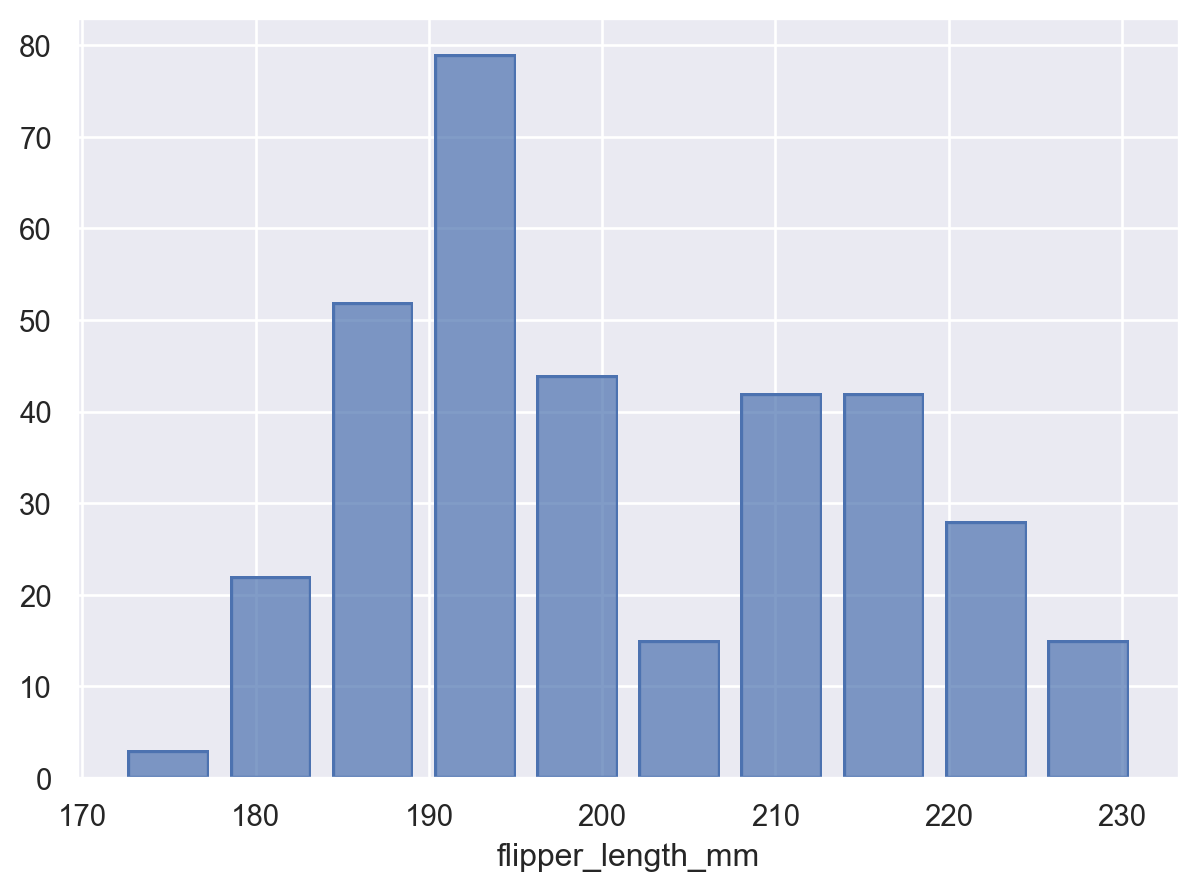

In [17]:
(
    so.Plot(penguins, x='flipper_length_mm')
    .add(so.Bar(), so.Hist())
)

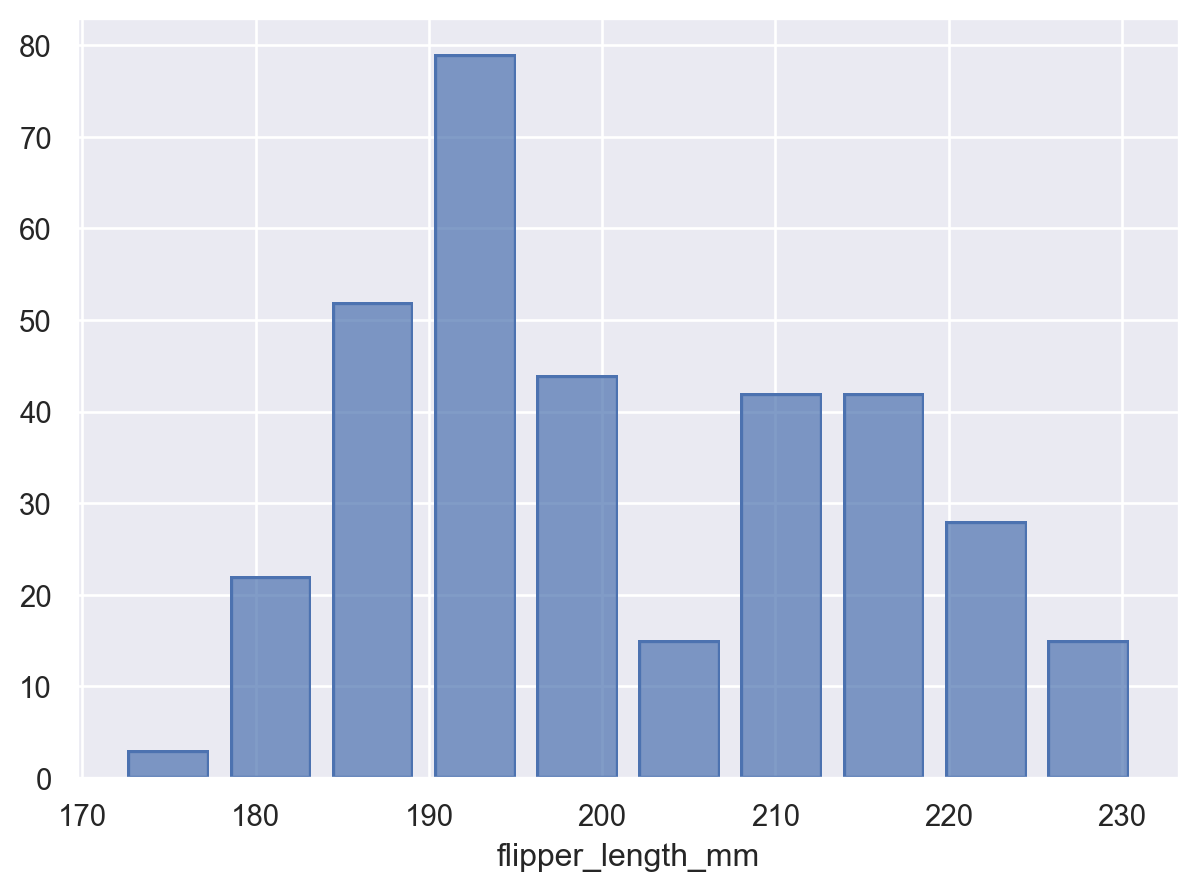

In [18]:
(
    so.Plot(penguins, x='flipper_length_mm')
    .add(so.Bar(), so.Hist())
)

여기서 우리는 연속형인 `x`축(axis)에 `Bar` 가 아닌 `Bars`를 사용했습니다. 
이 둘은 비슷하지만`Bars`의 default가 연속형 histogram에 더 적합하고, 더 효율적인 matplotlib artist를 만들어냅니다.   
marks에는 `Bar`, `Bars` 외에도 이렇게 단수/복수로 되어 있는 경우가 있습니다.
복수형으로 표현되는 경우가 더 많은 수의 marks를 표현하는데 적합합니다.  
  
어떤 변환은 `x`, `y`를 모두 받기도 합니다. 이 경우, 각 좌표에 구간 데이터(interval data)를 추가합니다. 집계(aggregating) 후에 표시되는 error bar도 이와 같은 과정을 거친 것입니다.

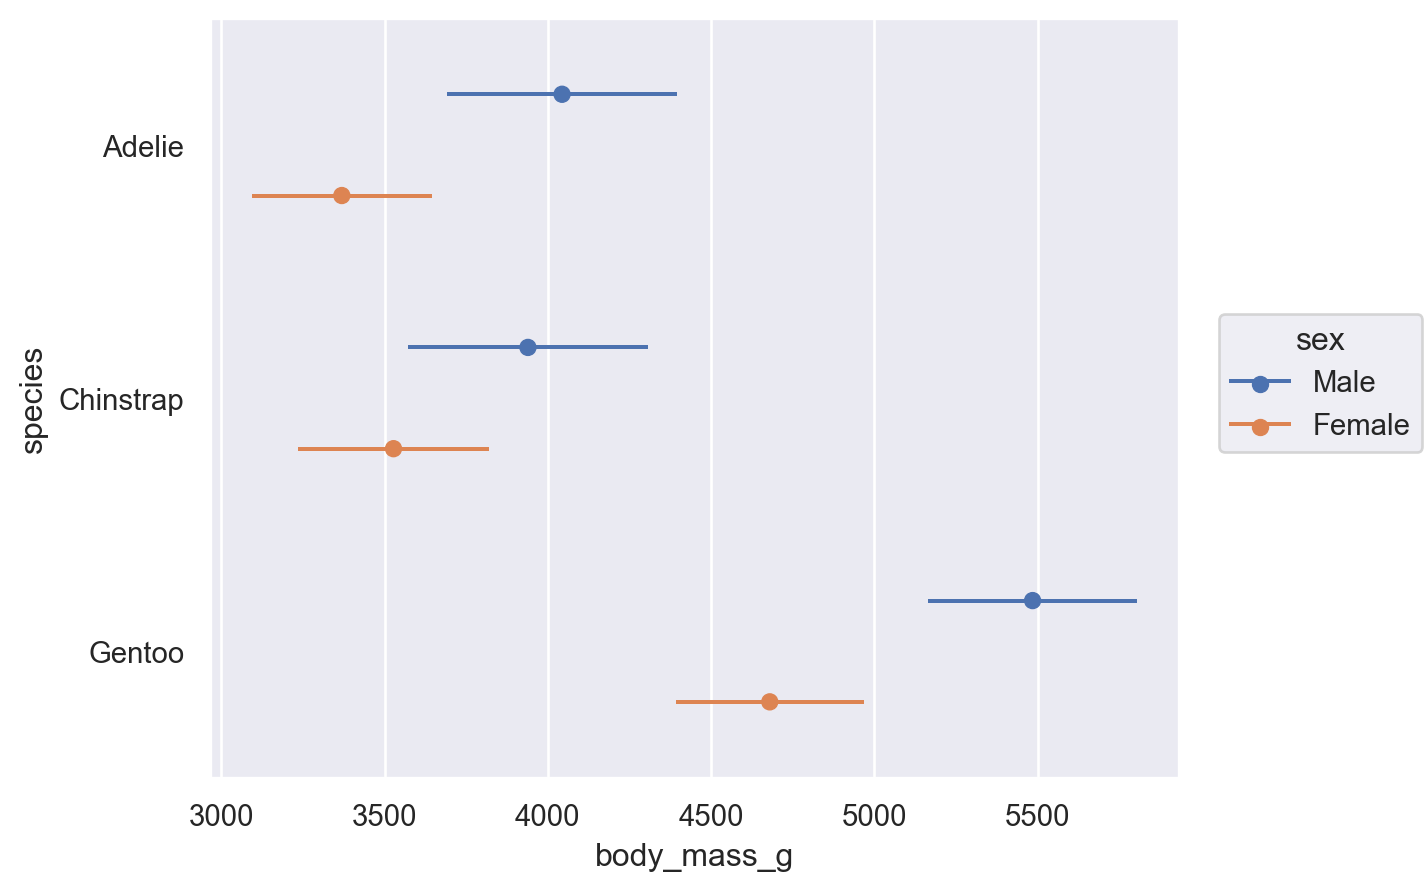

In [19]:
(
    so.Plot(penguins, x='body_mass_g', y='species', color='sex')
    .add(so.Range(), so.Est(errorbar='sd'), so.Dodge())
    .add(so.Dot(), so.Agg(), so.Dodge())
)

### 방향 설정하기
Orienting marks and transforms

When aggregating, dodging, and drawing a bar, the x and y variables are treated differently. Each operation has the concept of an orientation. The Plot tries to determine the orientation automatically based on the data types of the variables. For instance, if we flip the assignment of species and body_mass_g, we’ll get the same plot, but oriented horizontally:

집계하거나(aggregating), 분리이동하거나(dodging), bar를 그릴 때 `x`, `y` 변수는 다르게 취급됩니다. operartion마다 각각의 방향(orientation)관련 개념이 있습니다. `Plot`은 변수의 data type에 따라 orientation을 결정해줍니다. 예를 들어, 위의 예에서 `species`와 `body_mass_g`의 자리를 바꿔서 할당하면 방향만 수평으로 그려진 같은 플롯이 됩니다.

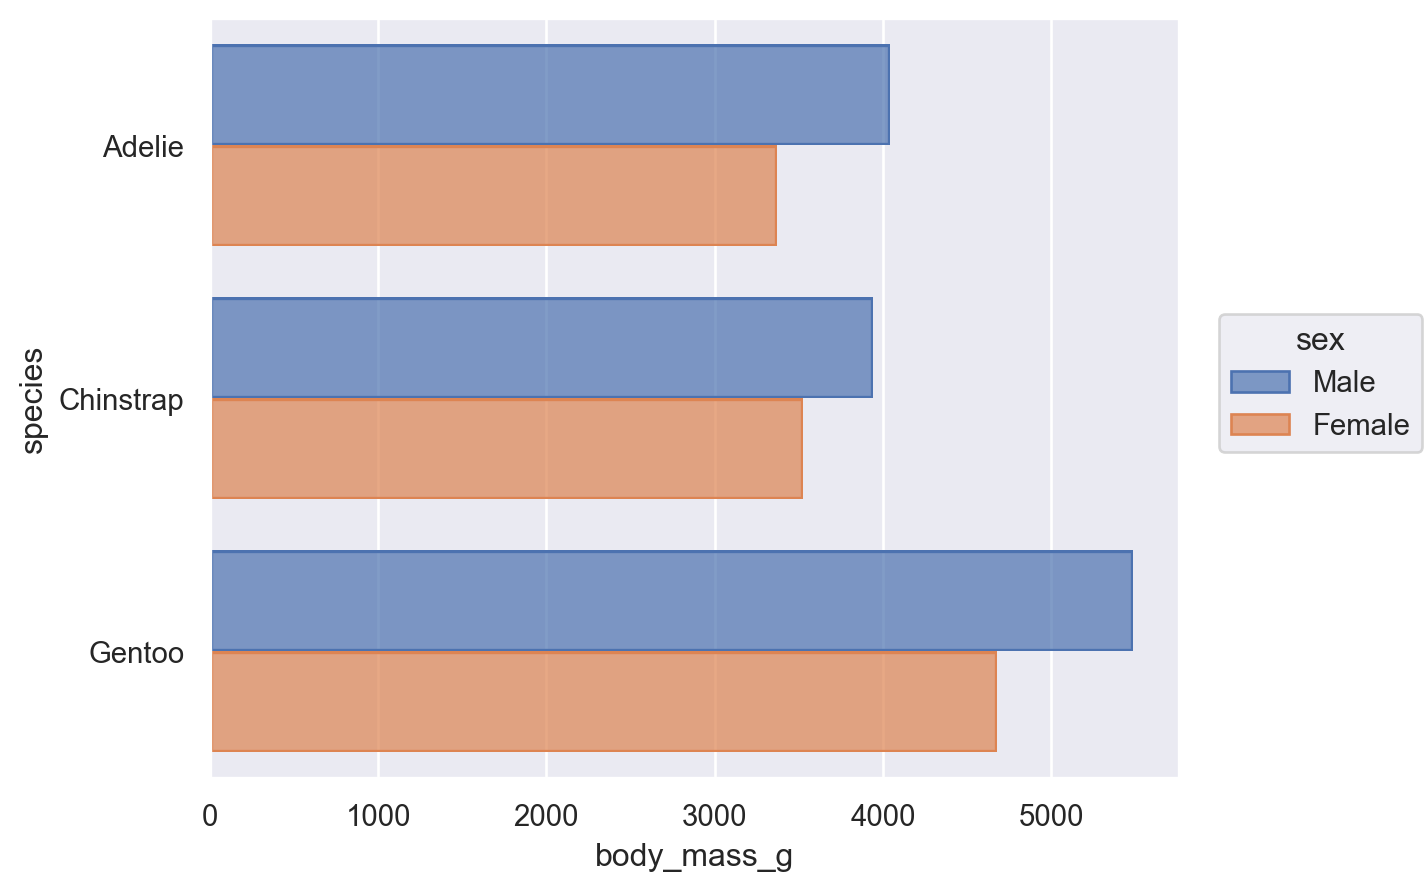

In [20]:
(
    so.Plot(penguins, x='body_mass_g', y='species', color='sex')
    .add(so.Bar(), so.Agg(), so.Dodge())
)

Sometimes, the correct orientation is ambiguous, as when both the x and y variables are numeric. In these cases, you can be explicit by passing the orient parameter to Plot.add():

때로는 `x`, `y` 변수가 모두 수치형이여서 orientation 을 결정하기 애매하기도 합니다. 이럴 떄는 `Plot.add()`에 parameter를 통해 orientation을 명시해주면 됩니다.

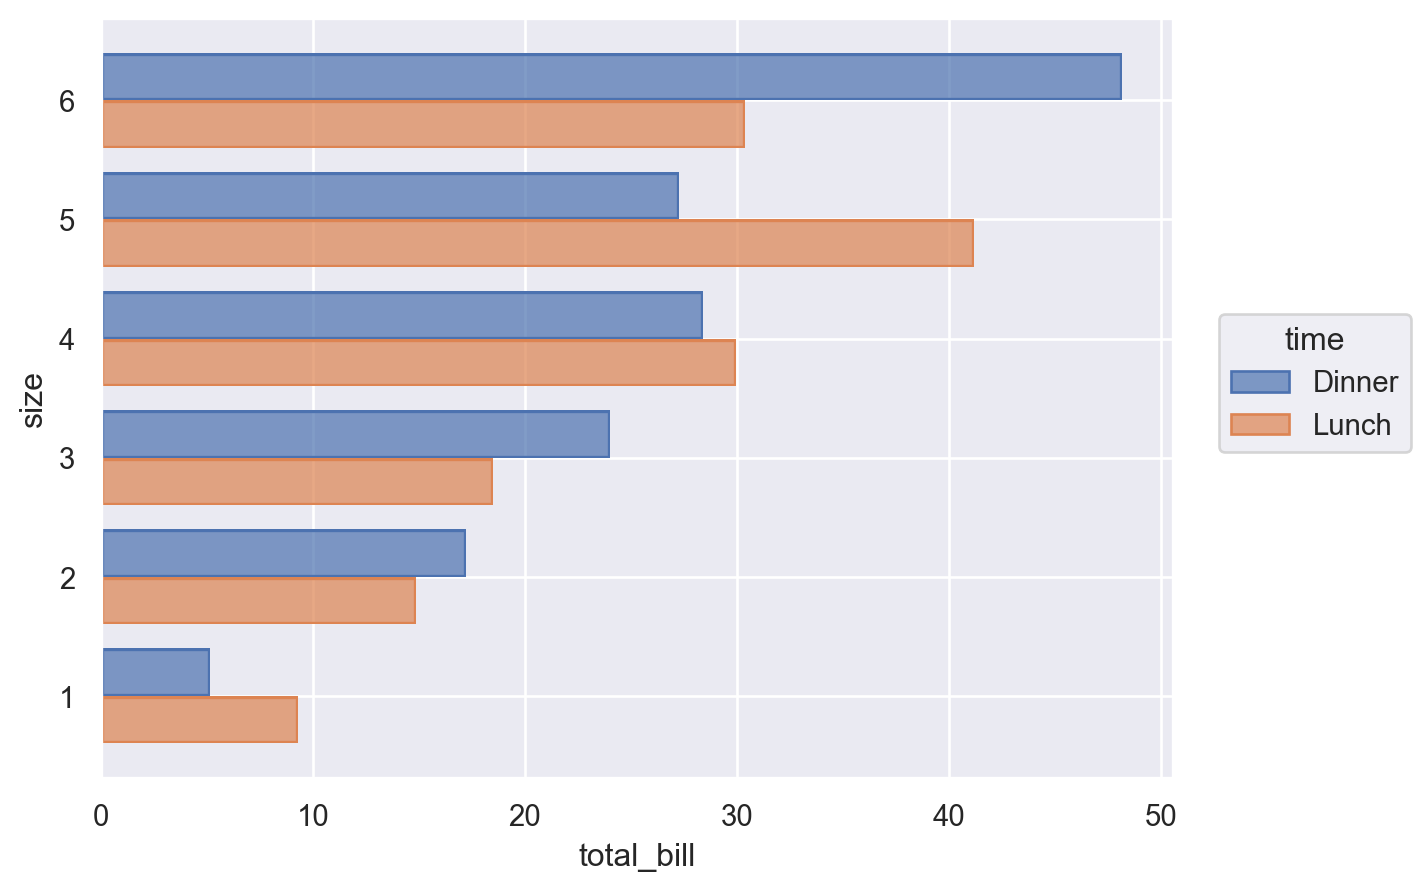

In [21]:
tips = sns.load_dataset('tips')
(
    so.Plot(tips, x='total_bill', y='size', color='time')
    .add(so.Bar(), so.Agg(), so.Dodge(), orient='y')
)

## 3. plot 작성 및 표시
Building and displaying the plot

지금까지의 예제에서는 하나의 subplot에 하나의 mark 종류를 생성했습니다. 사실 plot 에는 이런 제한이 없습니다.

### 여러개의  layer 추가하기
Adding multiple layers

`Plot.add()`를 여러번 반복 호출해서 더 복잡한 '단일 subplot 그래픽'을 만들 수 있습니다. `Plot.add()`는 호출될 떄마다 plot에 layer를 정의합니다. 예를 들어, dots()로 scatterplot을 먼저 생성하고, 그 다음 회귀선(regression fit)을 추가할 수 있습니다 :

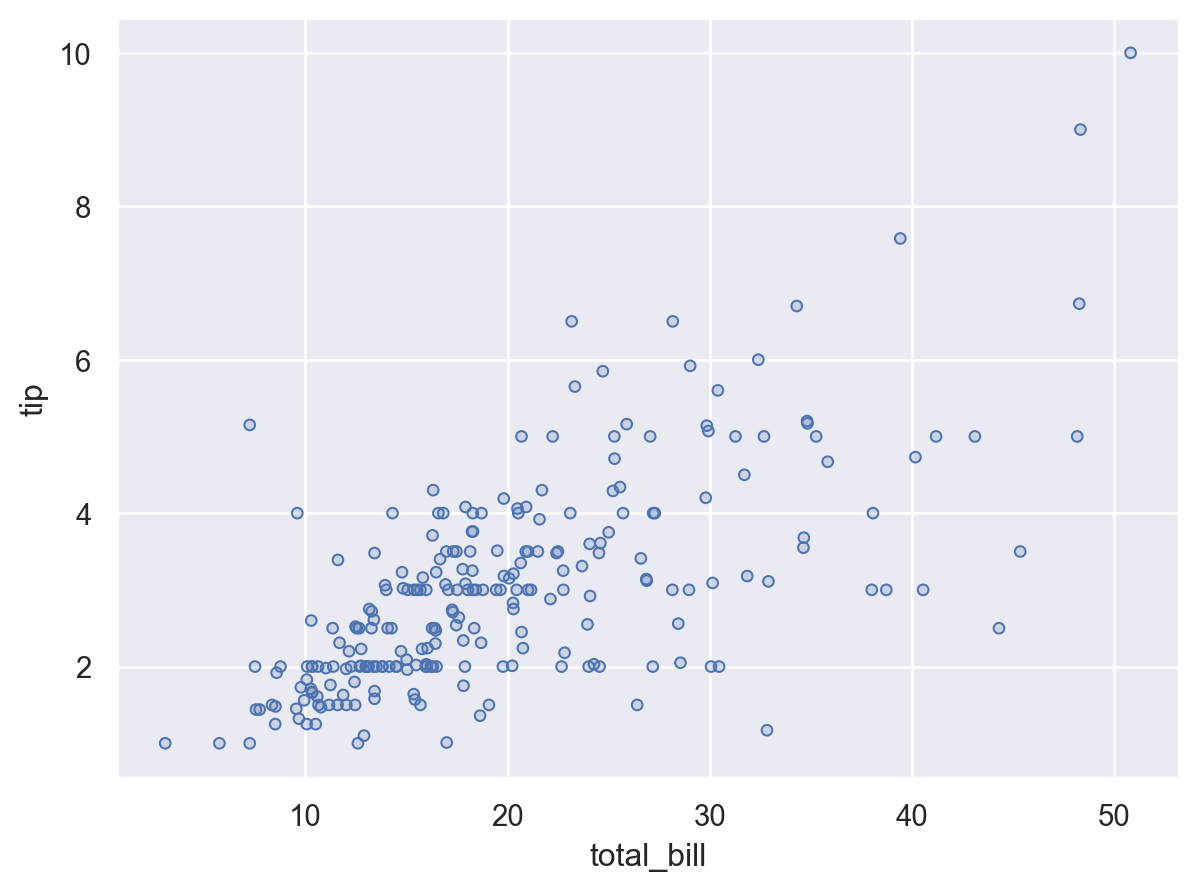

In [22]:
(so.Plot(tips, x='total_bill', y='tip')
    .add(so.Dots()))

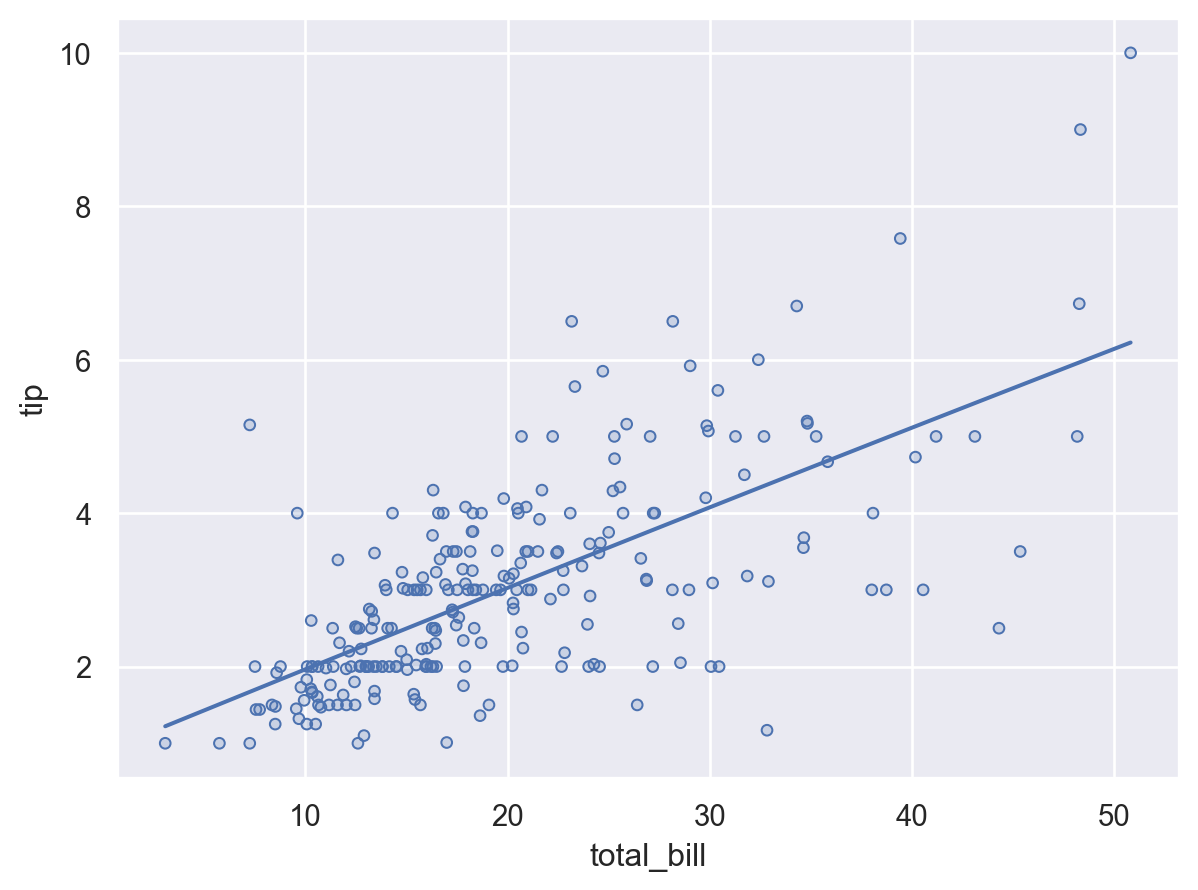

In [23]:
(so.Plot(tips, x='total_bill', y='tip')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit()))

`Plot`constructor 에 정의된 다양한 맵핑은 모두 layer에 사용할 수 있습니다.

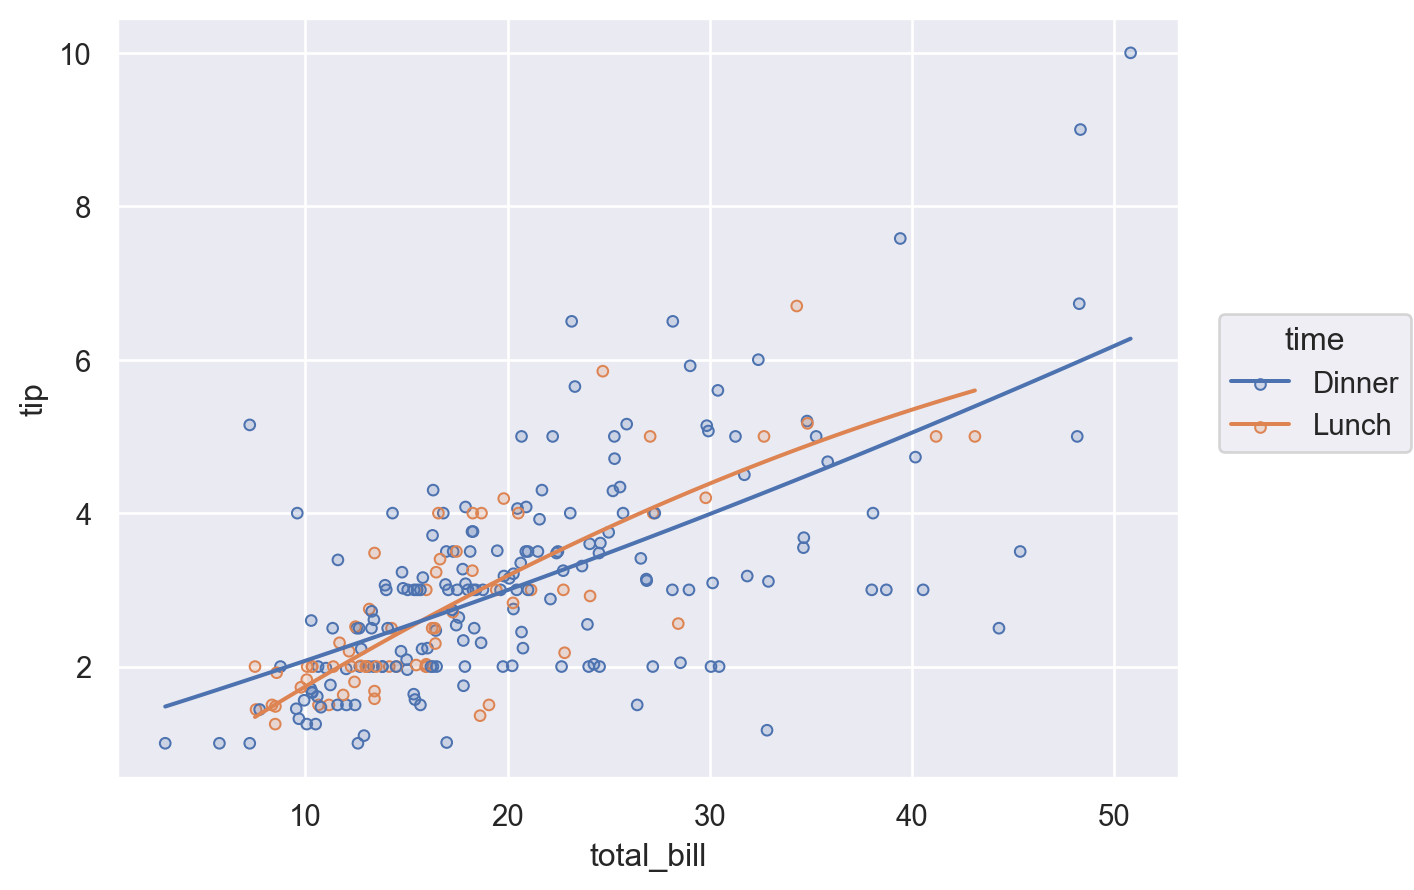

In [24]:
(
    so.Plot(tips, x='total_bill', y='tip', color='time')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

### 특정 layer에 맵핑하기
Layer-specific mappings

특정 layer를 지정해서 mapping을 정의할 수도 있습니다. 해당 layer에 `Plot.add` 를 호출해서 맵핑하면 됩니다.

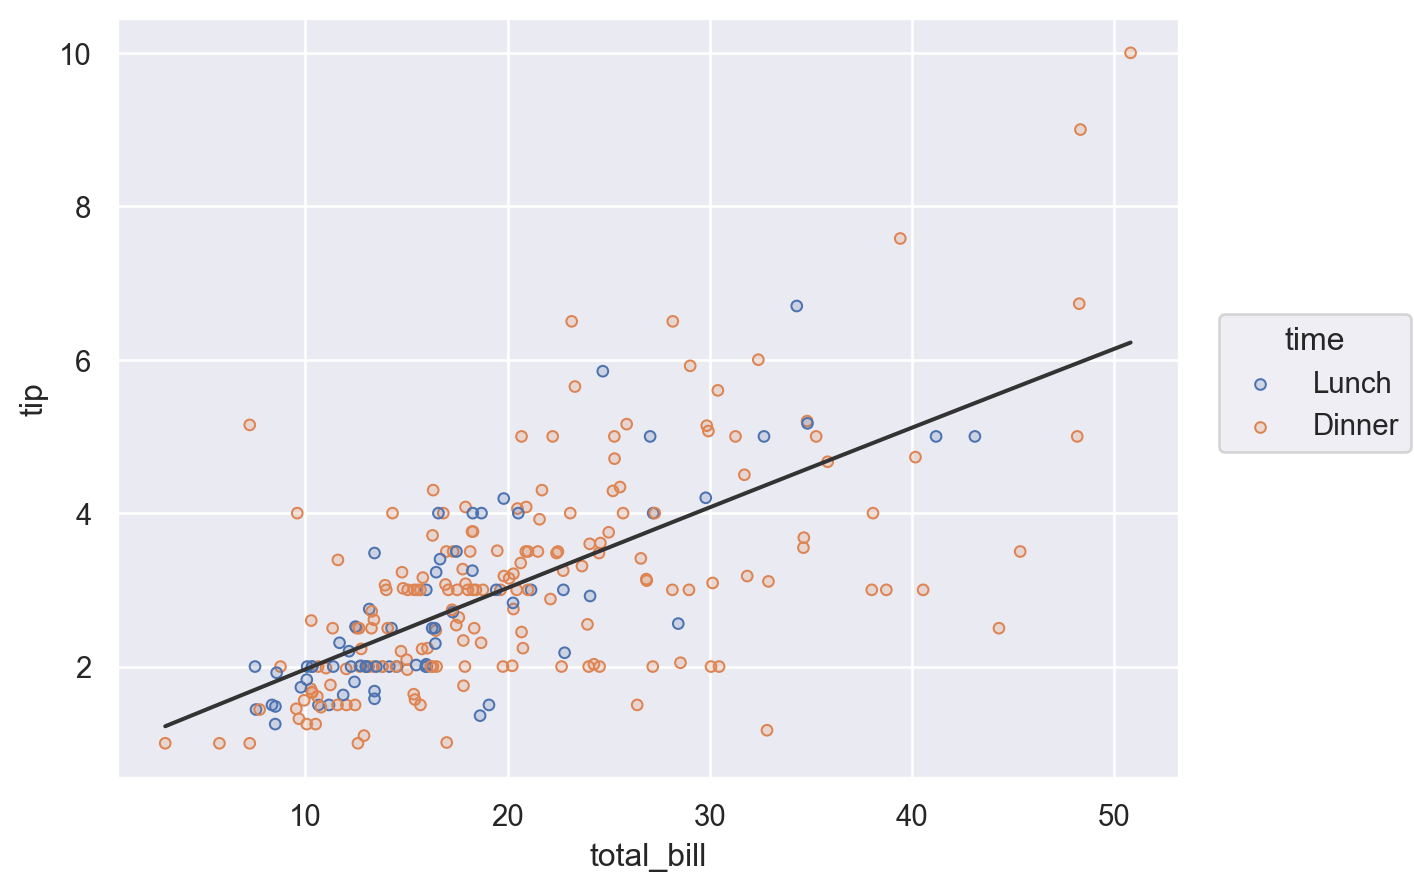

In [25]:
(
    so.Plot(tips, x='total_bill', y='tip')
    .add(so.Dots(), color='time')
    .add(so.Line(color='.2'), so.PolyFit())
)

layer를 전체 plot에서 정의하고, 특정 layer에서는 변수에 `None`을 넣어줘서 삭제시키는 방법도 있습니다.

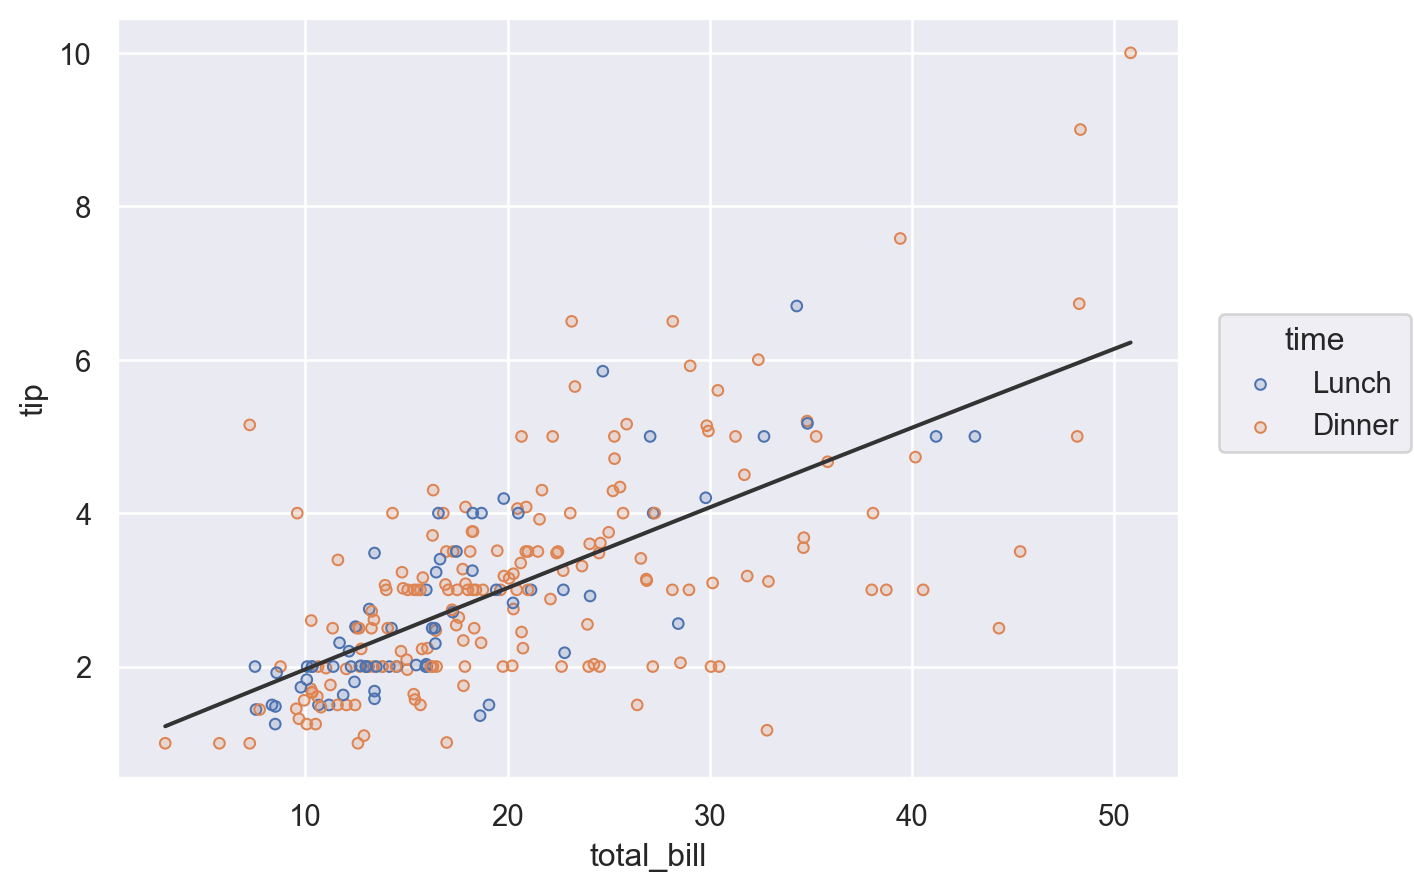

In [26]:
(
    so.Plot(tips, x='total_bill', y='tip', color='time')
    .add(so.Dots())
    .add(so.Line(color='.2'), so.PolyFit(), color=None)
)

정리하자면, mark 속성의 값을 지정하는데는 총 3가지 방법이 있습니다.
1) 변수를 전체 layer에 맵핑하는 방법 
2) 변수를 특정 layer에만 맵핑하는 방법
3) 속성(property)를 직접 설정하는 방법  
  
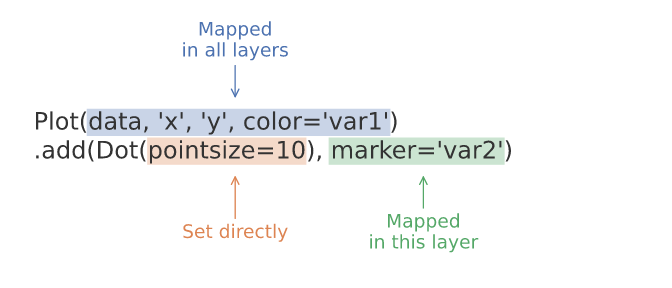

### subplot 면분할, 짝 맞추기 
Faceting and pairing subplots

`Plot` interface 에서도 figure-level function (ex. `seaborn.displot()`, `seaborn.catplot()`, etc.)처럼 여러개의 면(facet)을 가진 figure를 생성하거나, data의 일부만을 포함한 subplot을 생성할 수 있습니다. 
아래와 같이 `Plot.facet()` method를 사용하면 됩니다 :

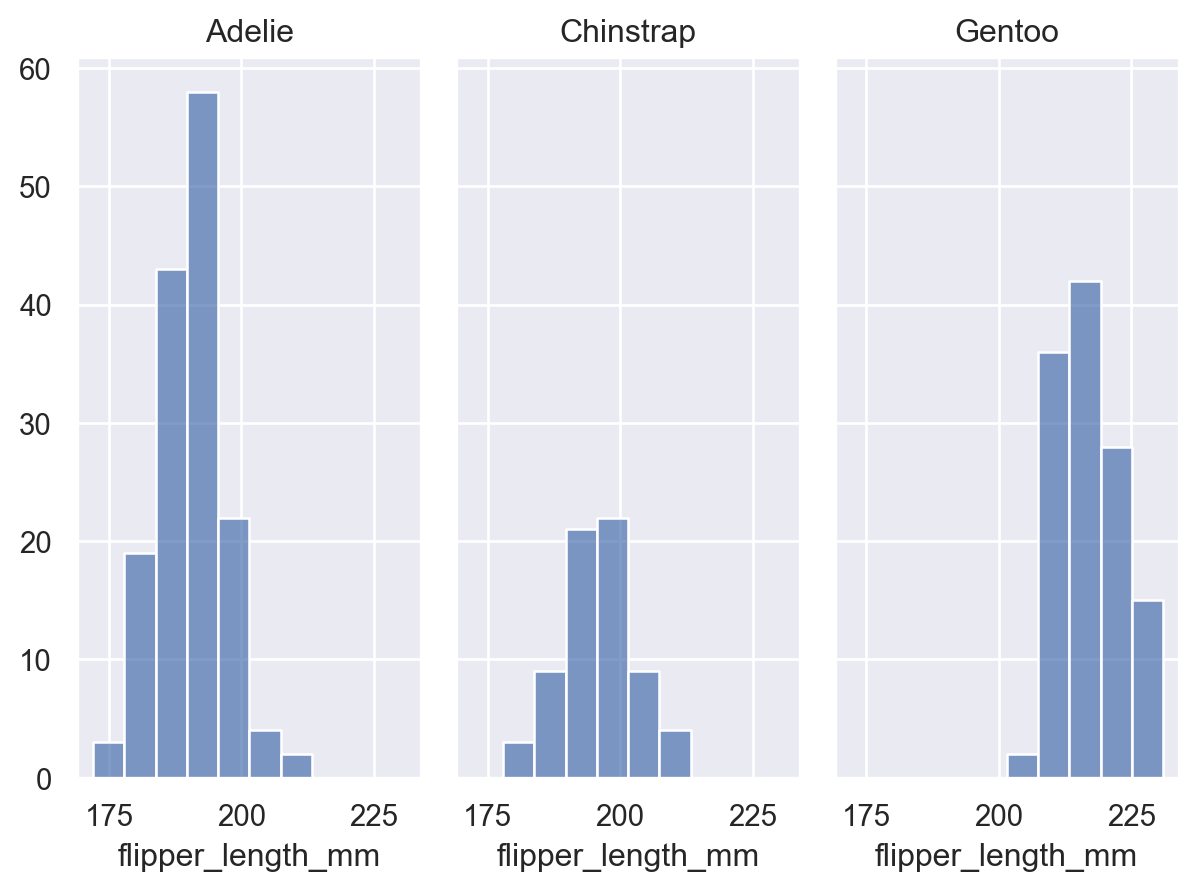

In [27]:
(
    so.Plot(penguins, x='flipper_length_mm')
    .facet('species')  # figure에서 species에 따라 facet 분할
    .add(so.Bars(), so.Hist())
)

plot의 column이나 row로 정의하려는 변수를 `Plot.facet()`에 담아서 호출하면 됩니다.

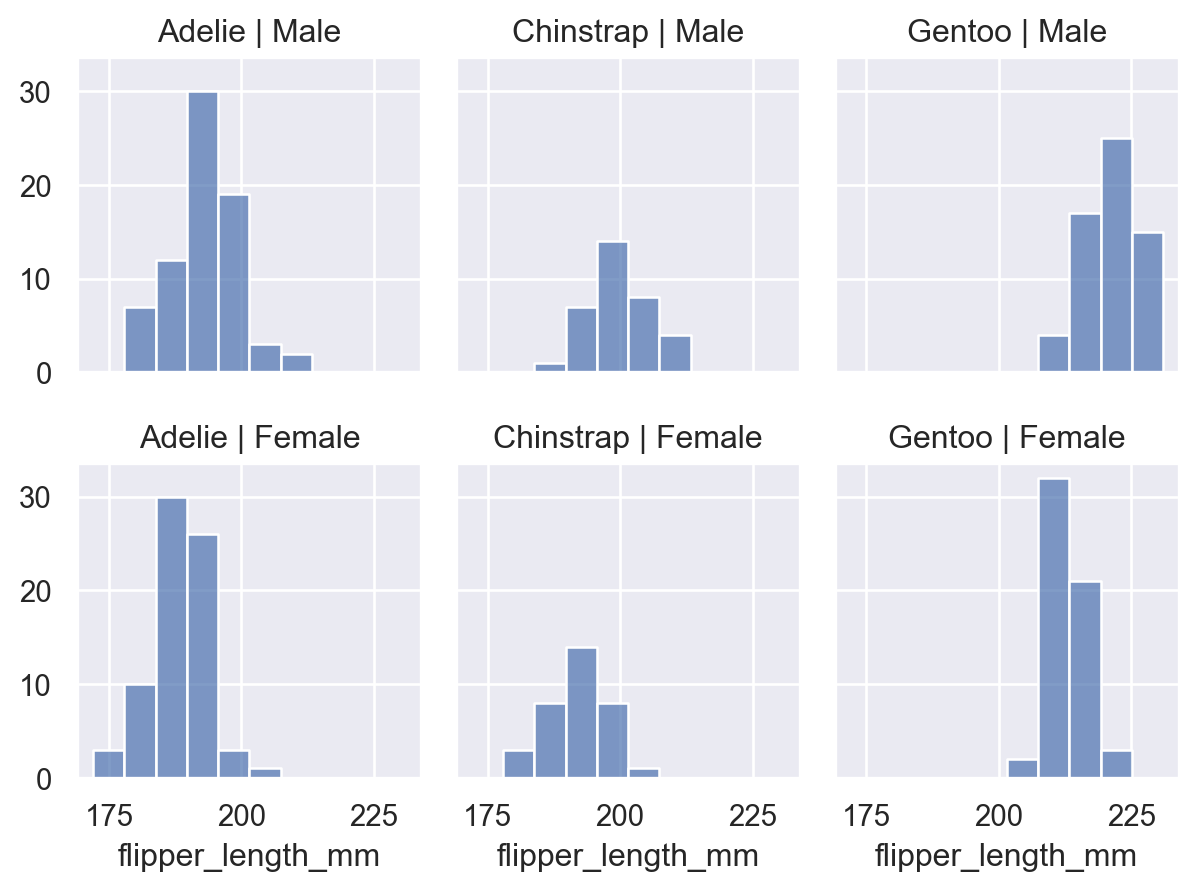

In [28]:
(
    so.Plot(penguins, x='flipper_length_mm')
    .facet(col='species', row='sex')
    .add(so.Bars(), so.Hist())
)

큰 숫자의 변수를 facet에 사용할 때는 'wapping'을 사용하면 됩니다.

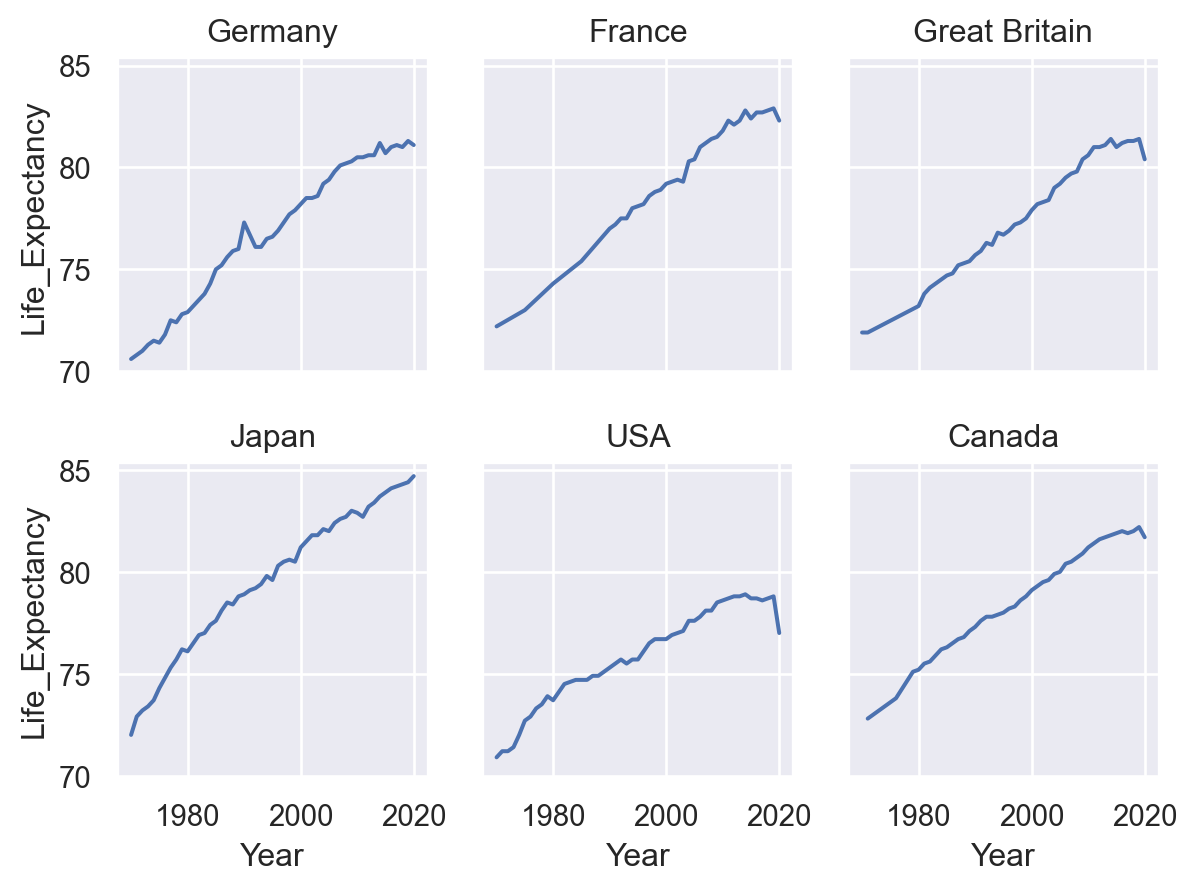

In [29]:
(
    so.Plot(healthexp, x='Year', y='Life_Expectancy')
    .facet(col='Country', wrap=3)
    .add(so.Line())
)

특정 layer를 의도적으로 제외하지 않는 한, 모든 layer가 facet 됩니다. 아래와 같이 subplot 별로 추가적인 맥락(context)를 제공할 수도 있습니다.

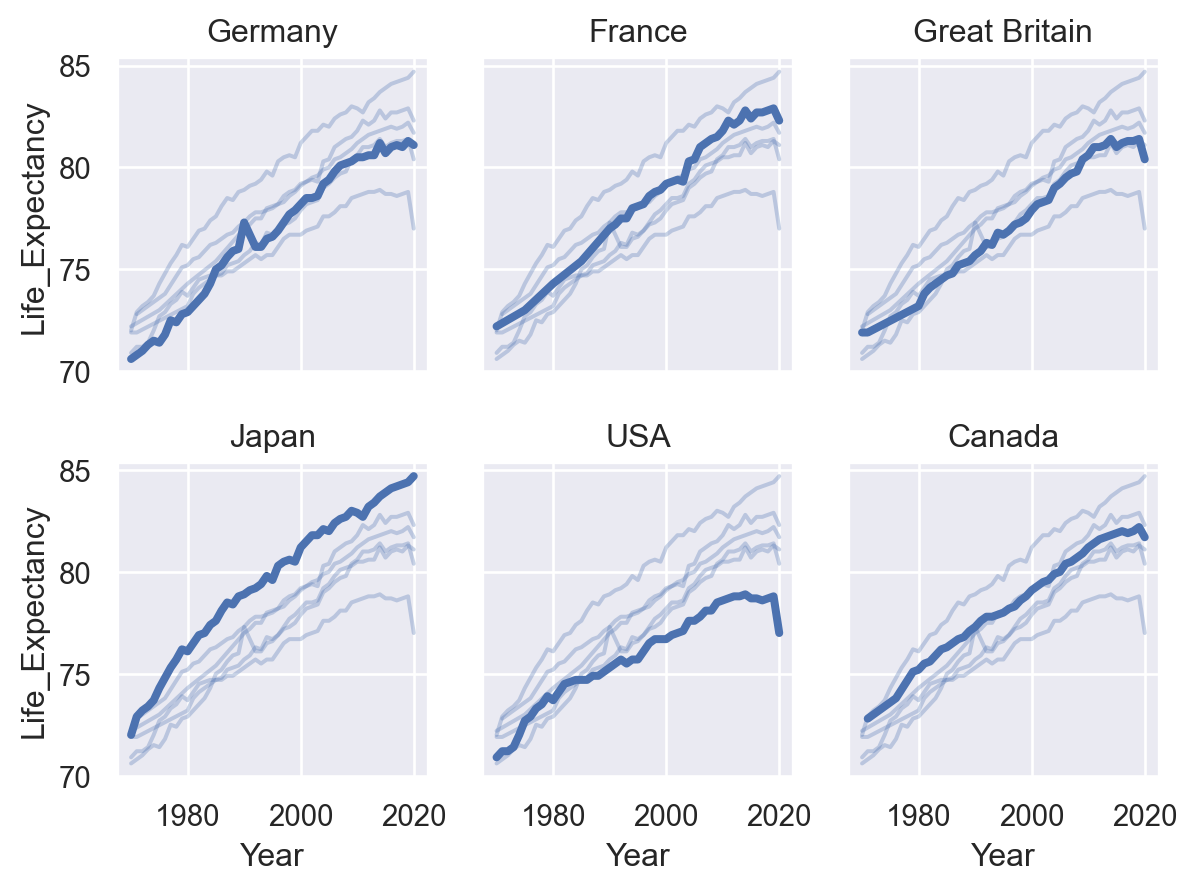

In [30]:
(
    so.Plot(healthexp, x='Year', y='Life_Expectancy')
    .facet('Country', wrap=3)
    .add(so.Line(alpha=.3,), group='Country', col=None)
    .add(so.Line(linewidth=3))
)

위 방법 외에, `Plot.pair()`로도 subplot을 생성할 수 있습니다. 이 방법은 x, y 좌표에 다른 변수들을 사용해서 `seaborn.PairGrid`처럼 모든 데이터를 각 subplot에 그려냅니다.

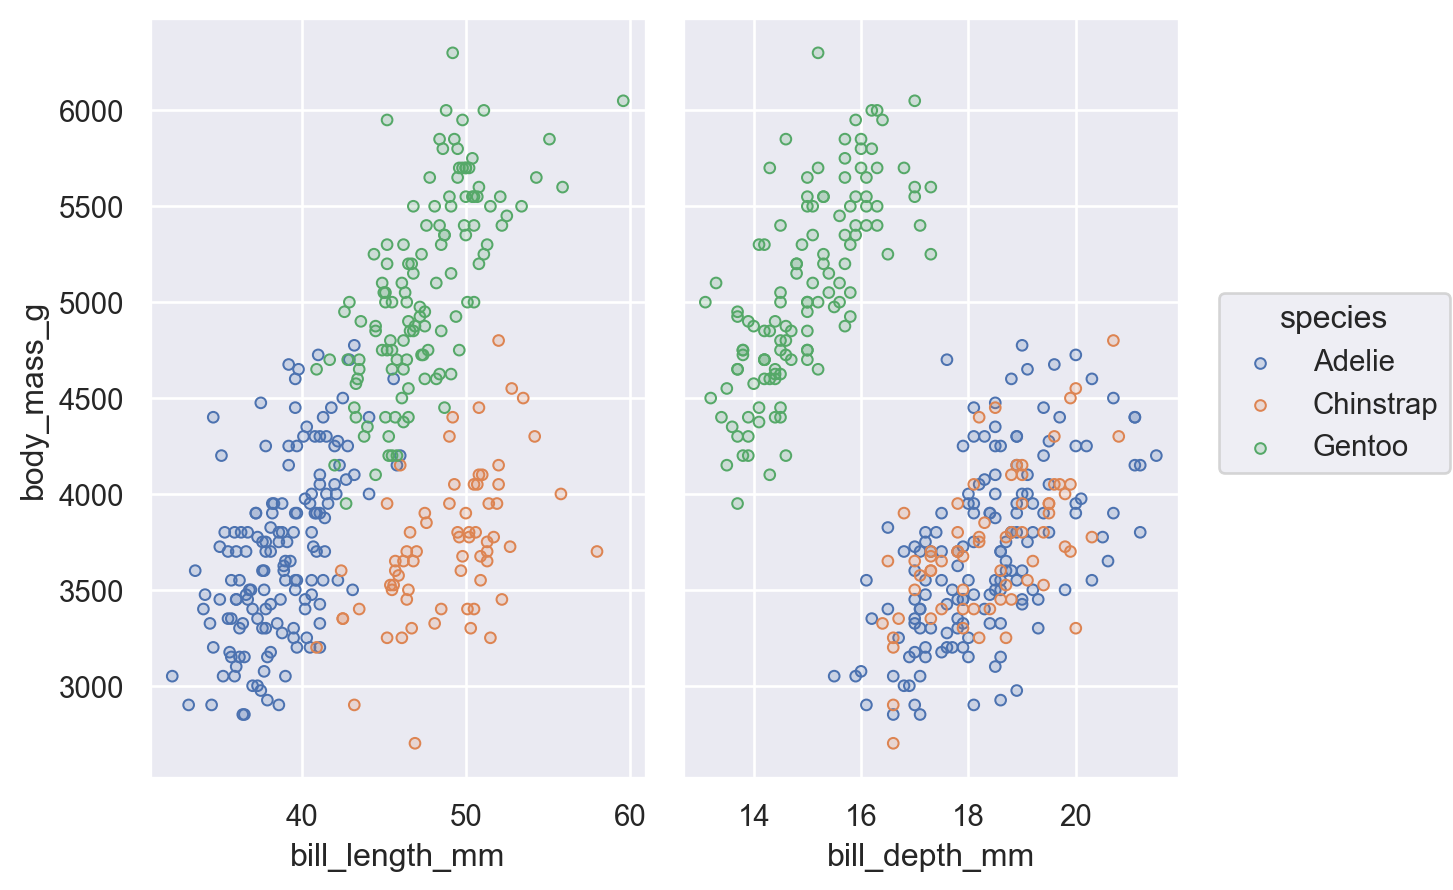

In [31]:
(
    so.Plot(penguins, y='body_mass_g', color='species')
    .pair(x=['bill_length_mm', 'bill_depth_mm'])
    .add(so.Dots())
)

faceting과 paring은 각기 다른 차원에서 subplot을 추가하는 경우에는 함꼐 사용할 수 있습니다.

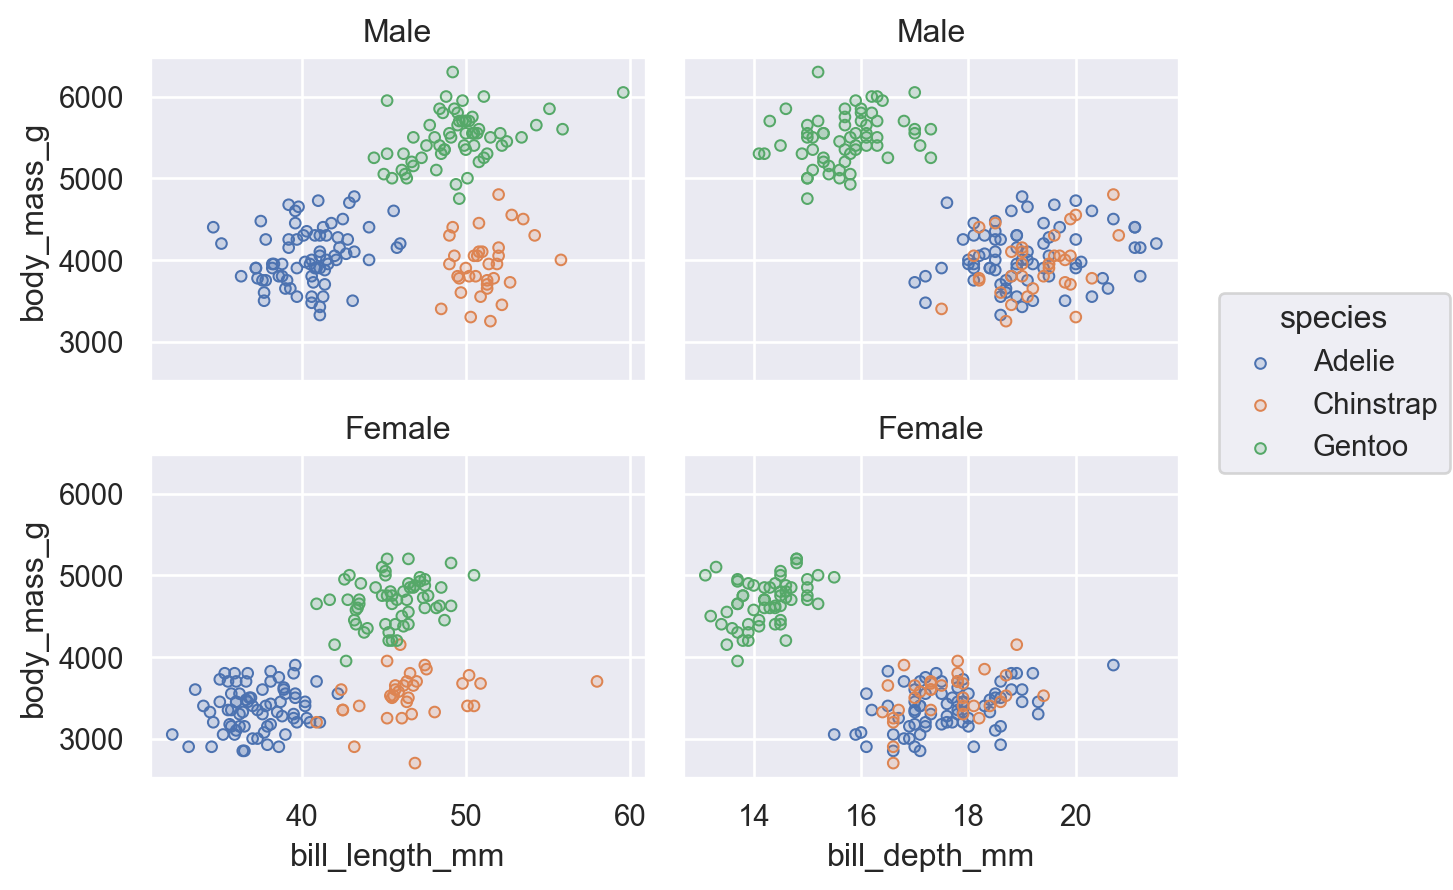

In [32]:
(
    so.Plot(penguins, y='body_mass_g', color='species')
    .pair(x=['bill_length_mm', 'bill_depth_mm'])
    .facet(row='sex')  # 위에서 paring을 x에 해서, col에는 사용 불가
    .add(so.Dots())
)

### matplotlib과 통합하기
Integrating with matplotlib

만약 더욱 복잡한 subplot을 figure에 표현하고 싶다면 `Plot.facet()`이나 `Plot.pair()`에서 제공하는 기능으로는 부족할 수도 있습니다. 
이럴 경우 지금으로서는 figure 설정을 matplotlib으로 위임하고, `Plot`이 필요한 matplotlib object를 `Plot.on()` method로 제공하는 것이 최선입니다. 
`matplotlib.axes.Axes`, `matplotlib.figure.Figure`, `matplotlib.figure.SubFigure` 등이 object가 될 수 있는데, 이 중 figure.SubFigure 이 bespoke subplot 레이아웃을 만드는데 가장 유용합니다.

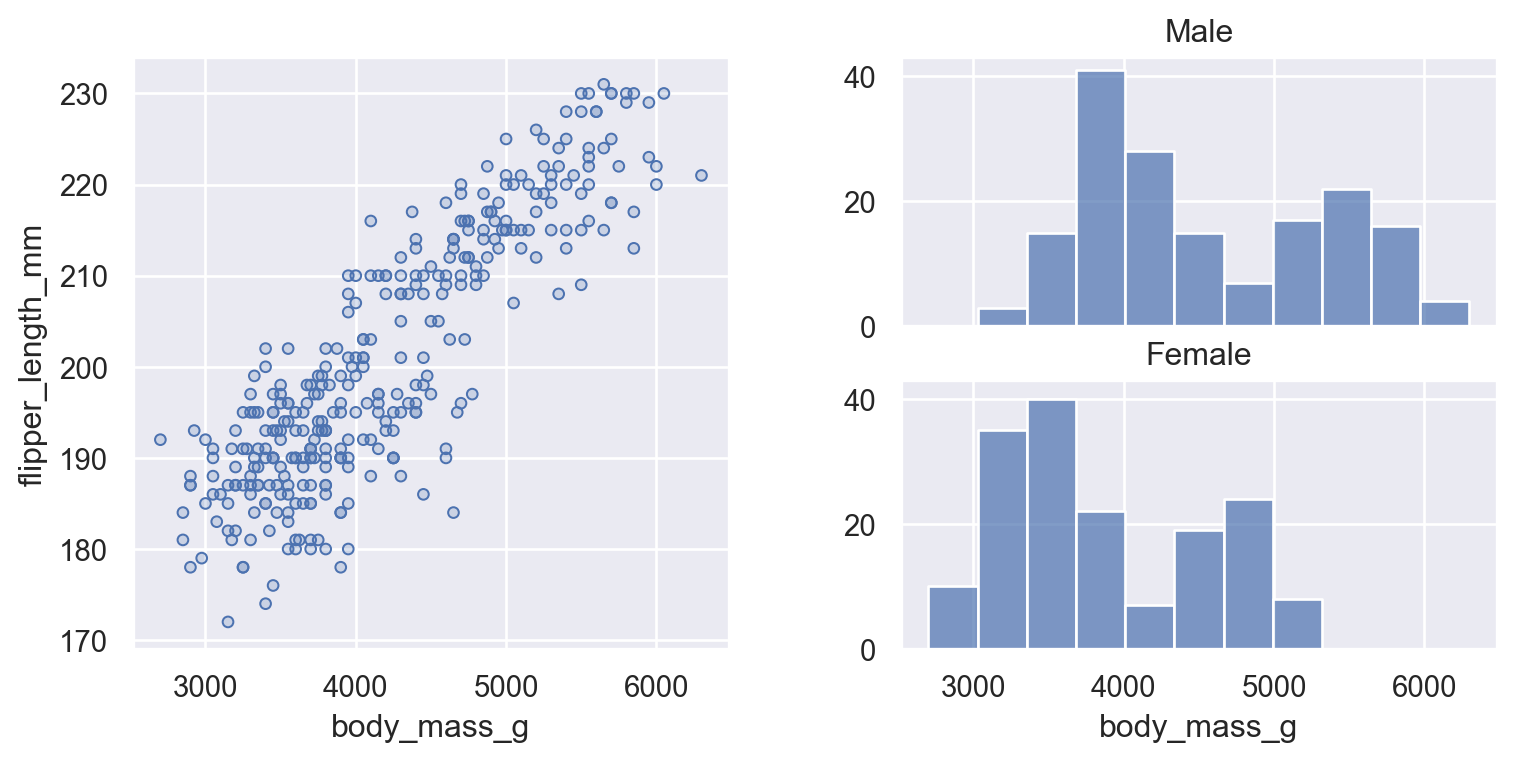

In [33]:
import matplotlib as mpl
f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x='body_mass_g', y='flipper_length_mm')
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x='body_mass_g')
    .facet(row='sex')
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

### plot 생성 및 나타내기
Building and displaying the plot

여기서 꼭 기억해야할 것이 있습니다. `Plot` methood는 호출된 object를 직접 업데이트하지 않고, 이 object의 복제본을 return 합니다. 즉, 공통 plot 규격(spec)을 정의하고, 여기서 몇가지 변화를 주면서 생성하는 것이 가능합니다.  
<br>  
예를 들어, 다음과 같이 기본 정보를 입력합니다.

In [34]:
p = so.Plot(healthexp, 'Year', 'Spending_USD', color='Country')

위의 p로 line plot을 그릴 수 있습ㄴ디ㅏ : 

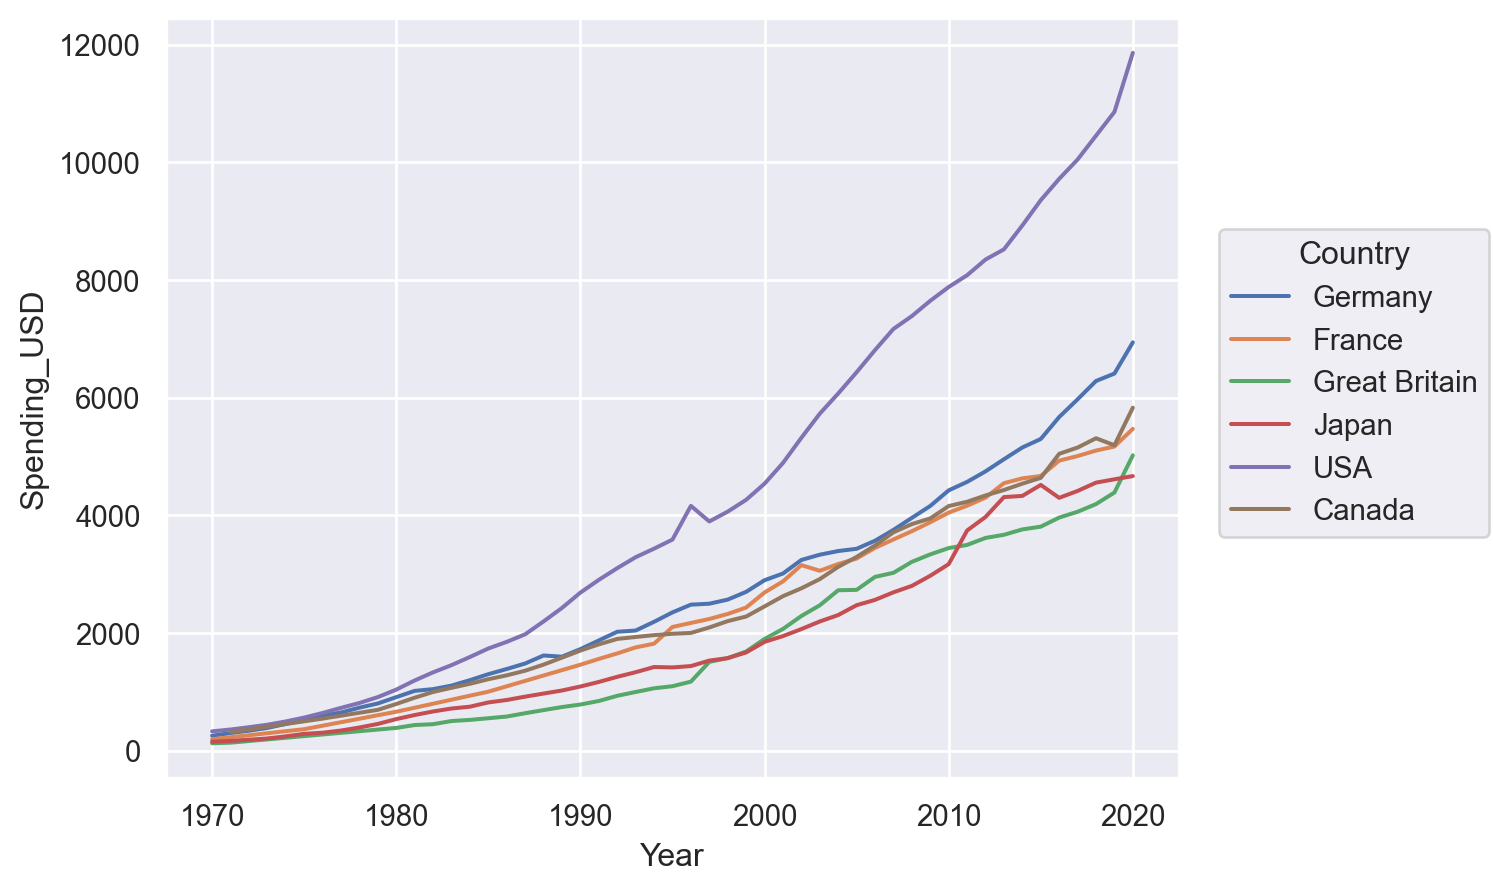

In [35]:
p.add(so.Line())

혹은 stacked area plot을 생성할 수도 있습니다 : 

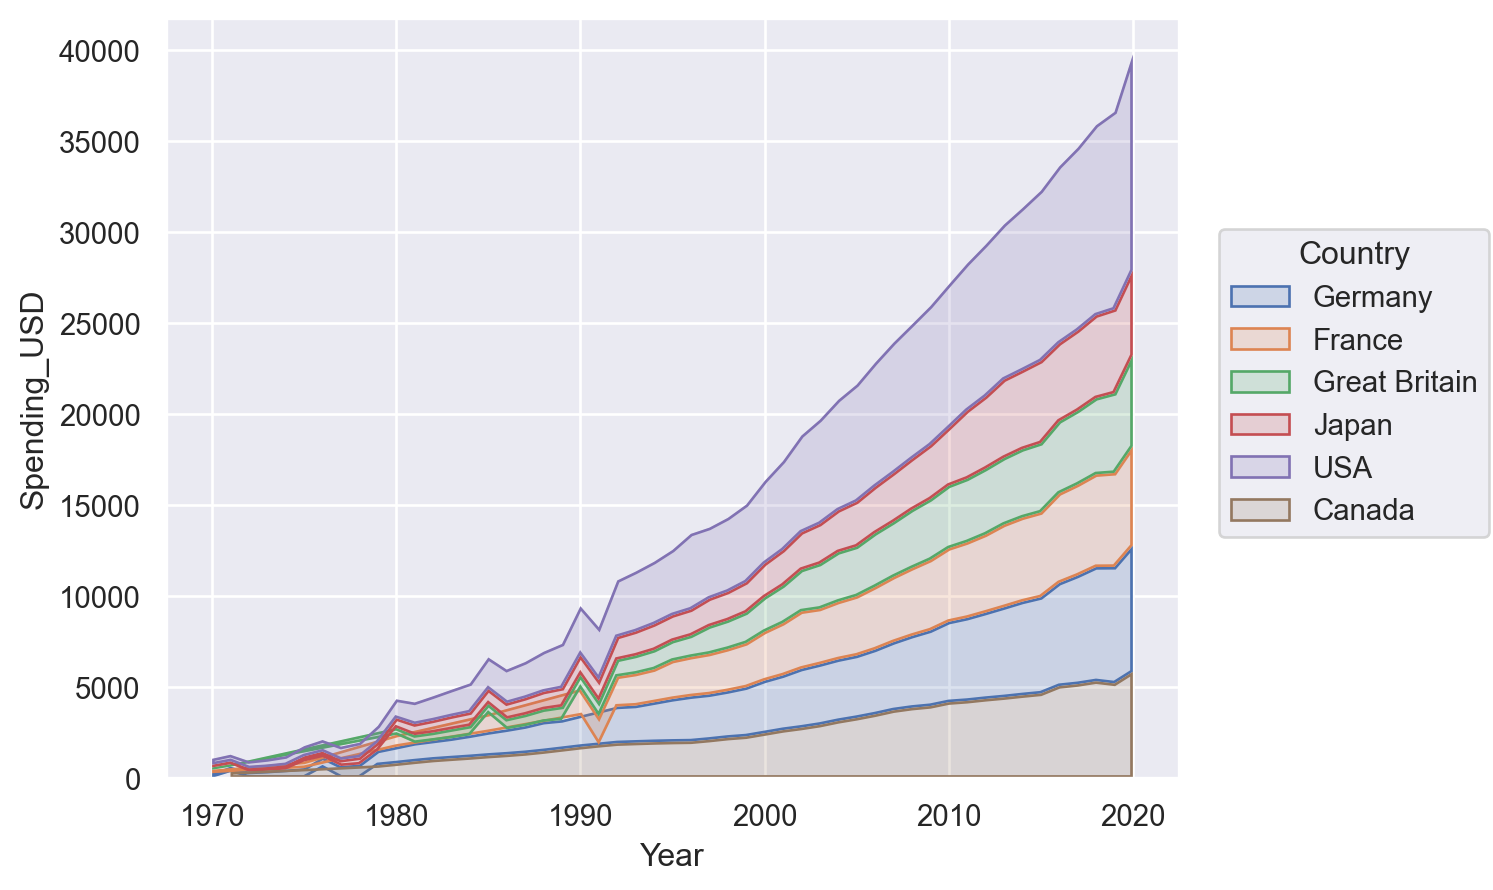

In [36]:
p.add(so.Area(), so.Stack())

Plot method는 완전히 선언적(declarative)입니다. Plot method를 호출하면 plot의 spec이 업데이트되지만, 사실상 plotd을 생성(plotting)하지는 않습니다.   
따라서, 어떤 method는 순서에 상관없이, 여러번 호출될 수도 있게 됩니다.  
  
그럼 plot은 언제 렌더 될까요? Plot은 notebook환경에서 사용에 최적화되어 있습니다. 렌더링은 Plot이 Jupyter REPL에 디스플레이되는 순간 자동으로 시작됩니다. 그래서 위에서 Plot이 REPL에 리턴하게 하지 않고, p에 할당했을 떄는 아무것도 나타나지 않은 것입니다.  
  
노트북에서 plot을 보려면, 맨 마지막 줄에서 plot을 return하거나 Jupyter에 내장된 display function을 사용하세요. 

노트북의 intergration(?)은 matplotlib.pyplot을 무시하지만, `Plot.show()`를 호출해서 figure-display 기능을 다른 곳에서 사용할 수 있습니다. 
<br>  
또, `Plot.save()`를 호출해서 plot을 file (혹은 buffer)로 저장할 수도 있습니다.

## 모양 커스터마이징
Customizing the appearance

이 새로운 interface는 `Plot`으로 굉장히 다양한 커스터마이징을 제공해서, 중간중간에 다른 장치(gear)를 사용하거나 matplotlib 기능을 사용자가 직접 사용하지 않아도 되게 해줍니다.
(하지만 아직 모든 기능들이 완전히 구현된 것은 아닙니다!)

### scale 을 매개변수로 나타내기
Parameterizing scales

모든 데이터종속(data-dependent) 속성은 `Scale` 개념과 `Plot.sacle()` method로 제어됩니다. 
여기서 method 에 들어가는 인수(argument)의 타입은 여러가지가 가능합니다.
예를 들어, (matplotlib에서의 scales와 가장 유사한 방법으로) 좌표를 변경하는 function의 이름을 패스해주면 됩니다 : 

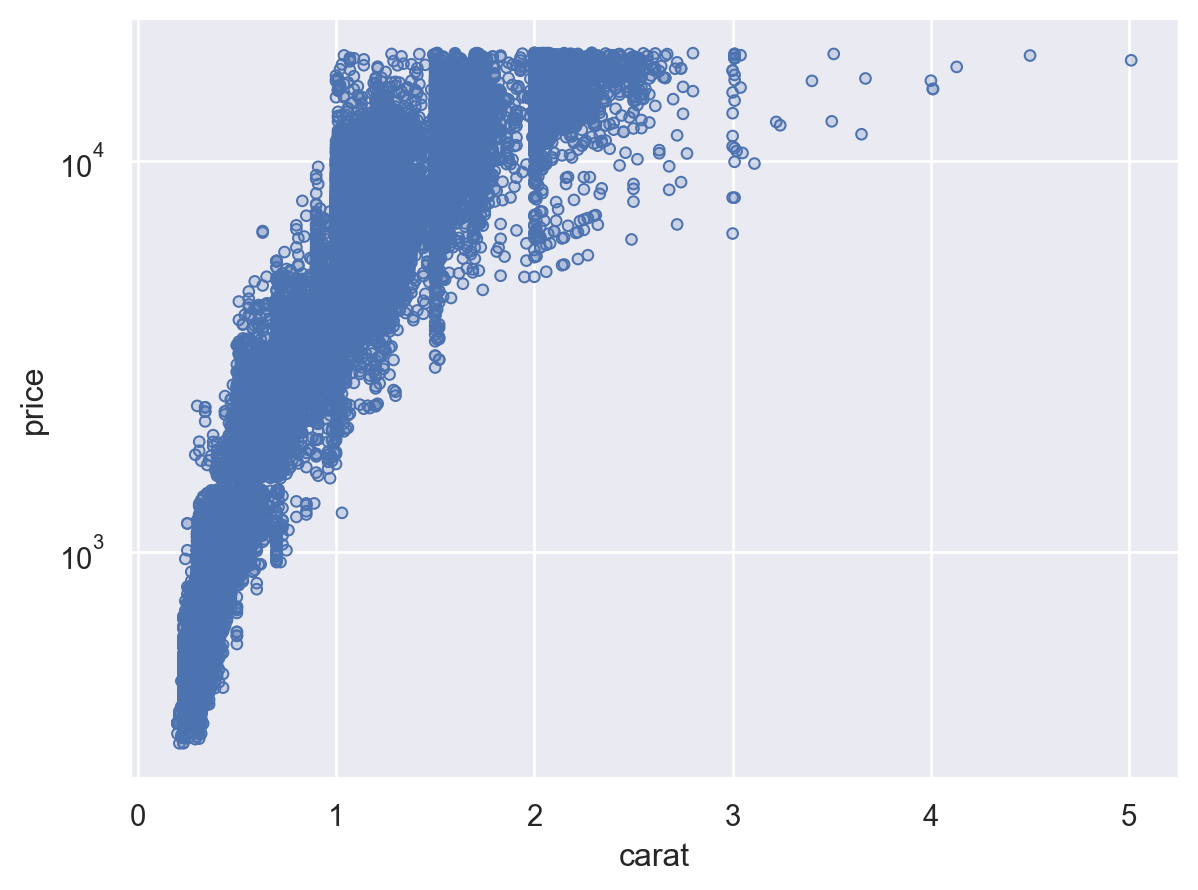

In [37]:
diamonds = sns.load_dataset('diamonds')
(
    so.Plot(diamonds, x='carat', y='price')
    .add(so.Dots())
    .scale(y='log')
)

`Plot.scale()`로 `color`와 같은 의미속성(semantic properties)의 맵핑을 제어할 수도 있습니다. 
seaborn의 function interface에서 patlette parameter로 사용했던 어떤 값을 argument로 넣어주면 됩니다.

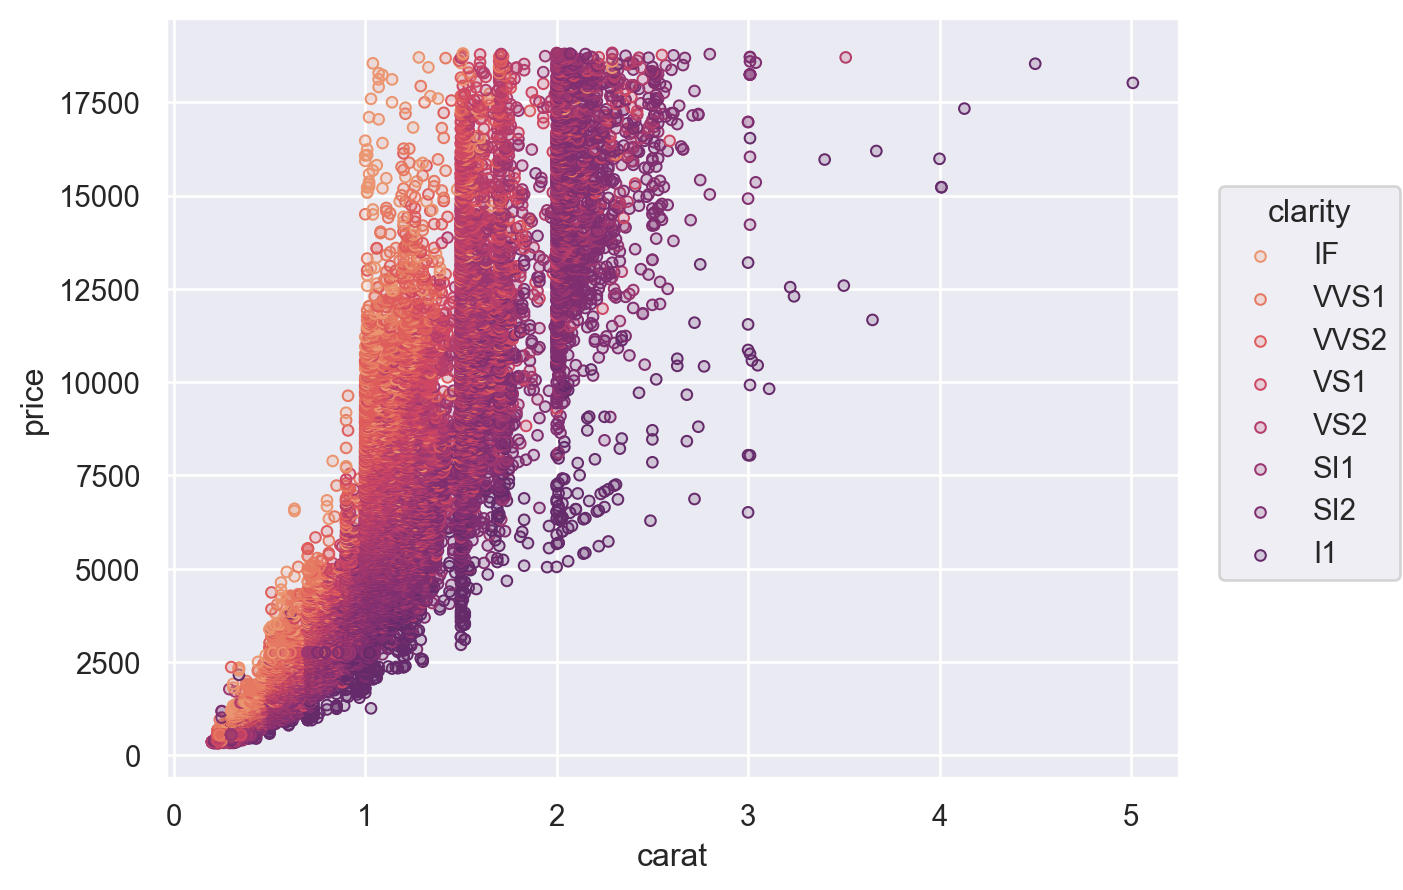

In [38]:
(
    so.Plot(diamonds, x='carat', y='price', color='clarity')
    .add(so.Dots())
    .scale(color='flare')
)

또다른 옵션으로 `(min, max)` 값의 튜플(tuple)로 범위를 제어하는 방법이 있습니다.
이 방법은 수치형속성(numeric properties)나 컬러 모두에 적용 가능합니다.

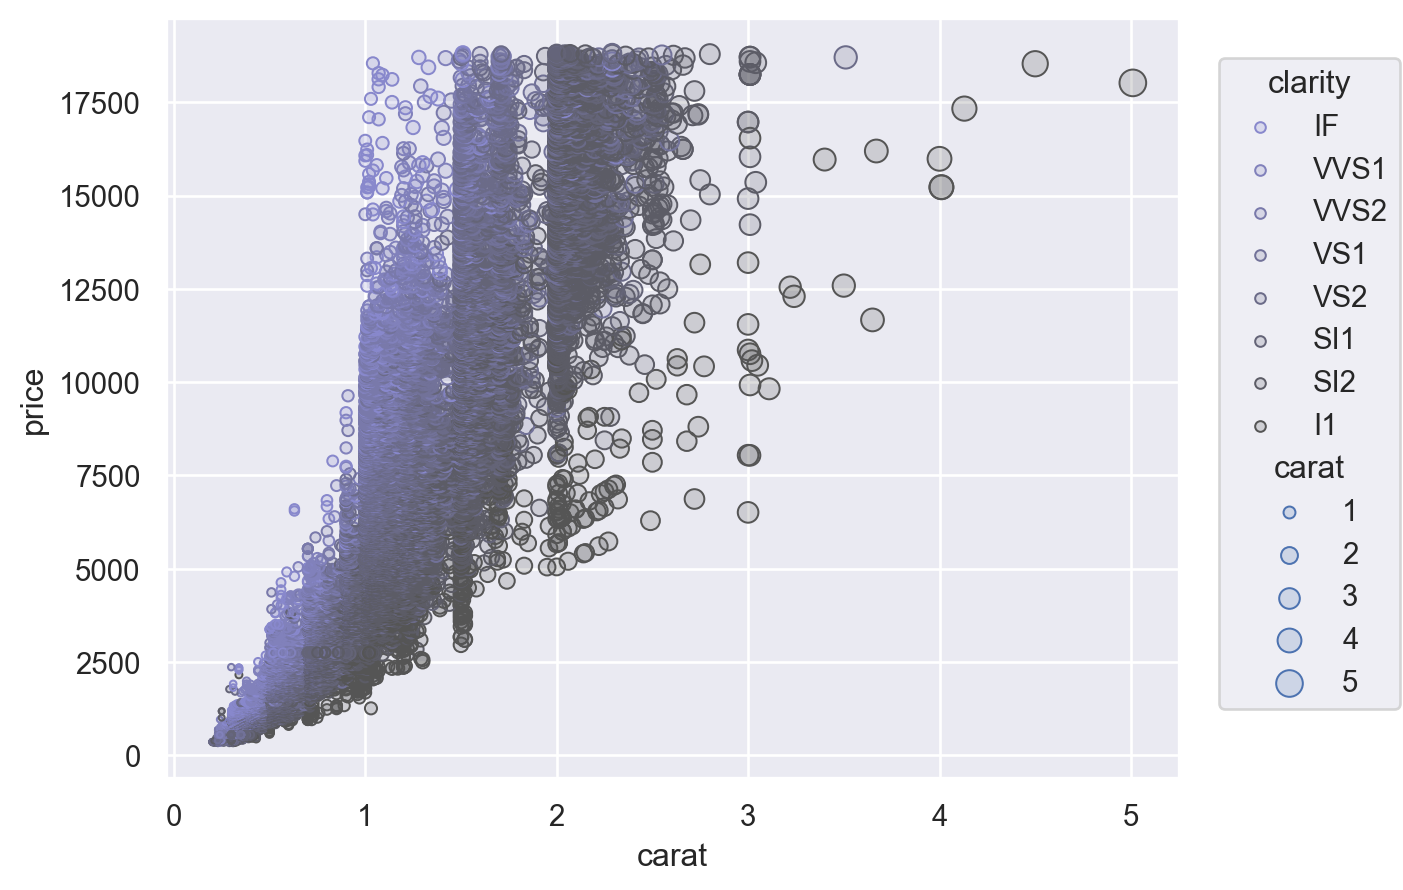

In [39]:
(
    so.Plot(diamonds, x='carat', y='price', color='clarity', pointsize='carat')
    .add(so.Dots())
    .scale(color=("#88c", "#555"), pointsize=(2, 10))
)

추가적인 조작을 원한다면 `Scale` object를 넘겨주면 됩니다. 
`Scale`에는 몇가지의 타입이 있고, 각 타입마다 parameter가 있습니다. 
예를 들어, `Continuous`에는 `norm`(input 도메인), `values`(output 범위), `trans`(앞의 둘을 맵핑하는 function)가 있습니다. 
다른 예로 `Nominal`에는 ordering(순서)를 정할 수 있습니다 :

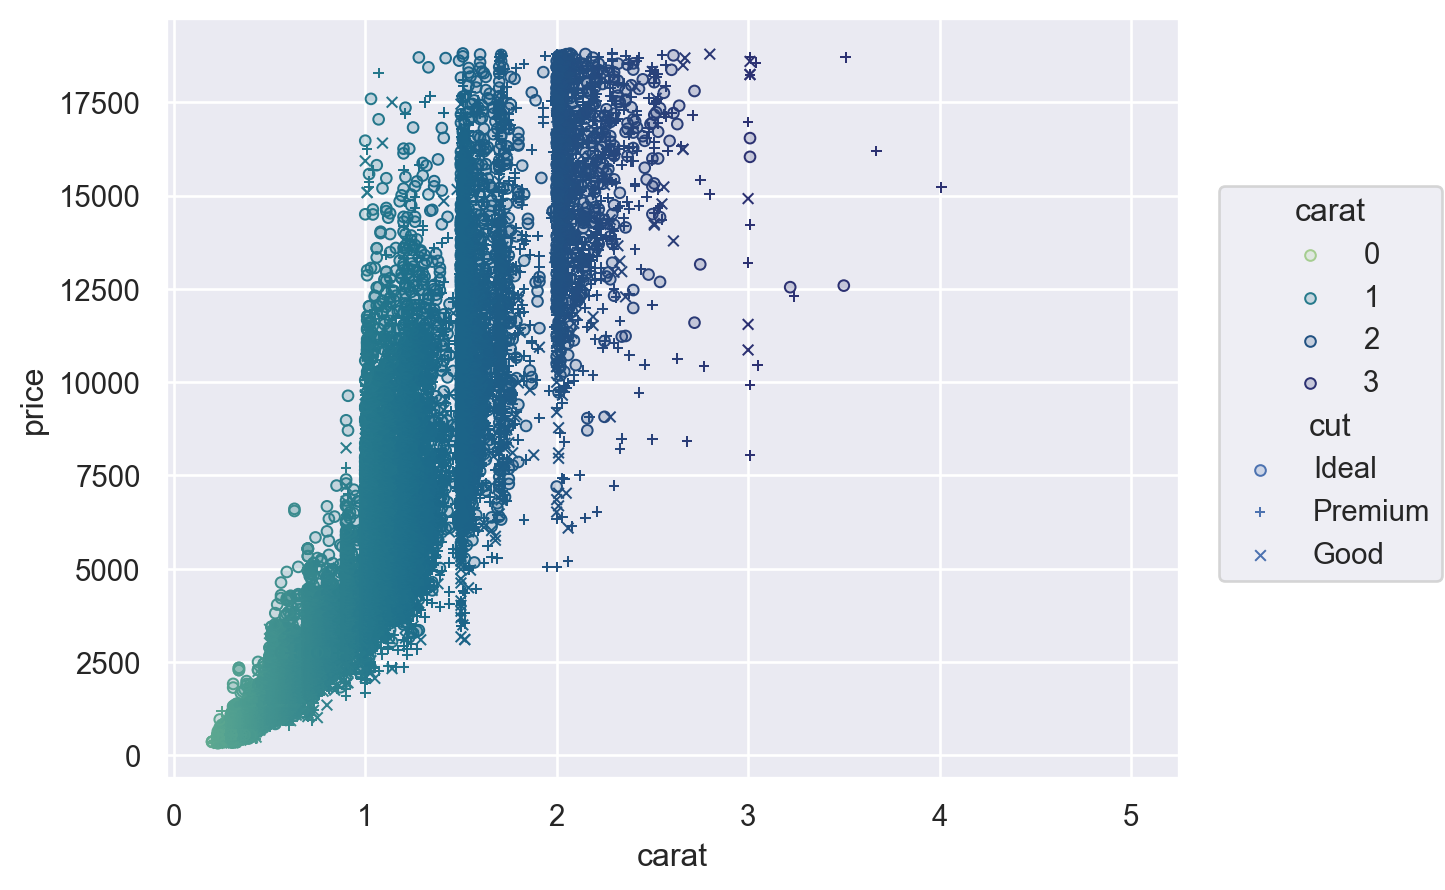

In [44]:
(
    so.Plot(diamonds, x='carat', y='price', color='carat', marker='cut')
    .add(so.Dots())
    .scale(
        color=so.Continuous('crest', norm=(0, 3), trans='sqrt'),
        marker=so.Nominal(['o', '+', 'x'], order=['Ideal', 'Premium', 'Good'])
    )
)

### legends와 tick 커스터마이즈
Customizing legends and ticks

`Scale` object는 틱(tick), 레이블(label), 범례(legend)의 모양뿐만 아니라 그 값까지 지정할 수 있게 해줍니다. 
예를 들어, `Continuous.tick()` method 로는 tick의 위치나 밀도를 정할 수 있고, `Continuous.label()` method 로는 레이블의 format(표현형식)을 변경할 수 있습니다.

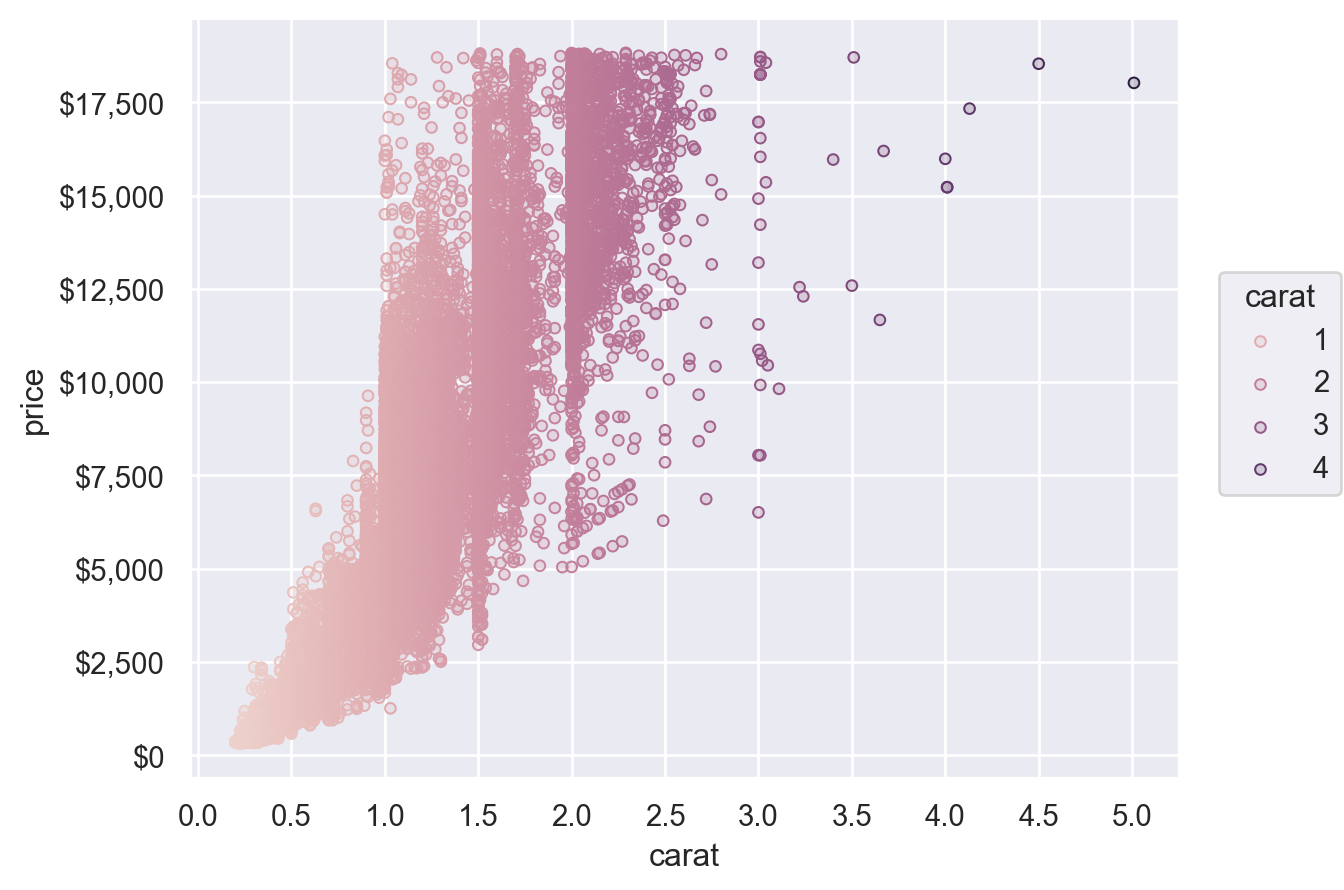

In [55]:
(
    so.Plot(diamonds, x='carat', y='price', color='carat')
    .add(so.Dots())
    .scale(
        x = so.Continuous().tick(every=0.5),
        y = so.Continuous().label(like="${x:,.0f}"),
        color = so.Continuous().tick(at=[1, 2, 3, 4])
    )
)

### 축범위, 레이블, 제목 커스터마이즈
Customizing limits, labels, and titles

`Plot`에는 `Plot.label()`, `Plot.limit()`, `Plot.share()`처럼 간단하게 커스터마이징 할 수 있는 method 들이 있습니다.

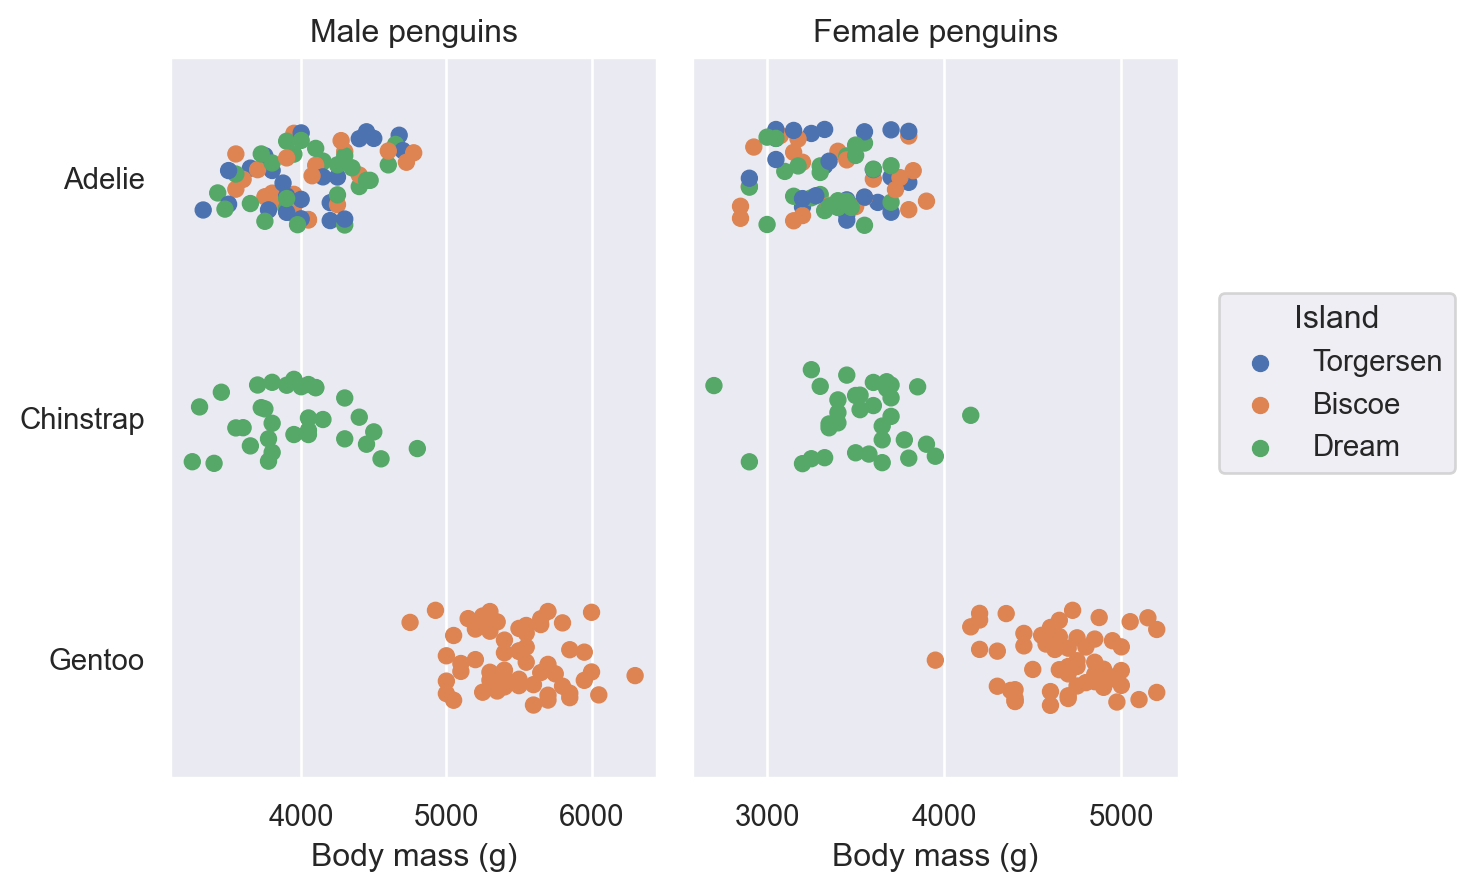

In [77]:
(
    so.Plot(penguins, x='body_mass_g', y='species', color='island')
    .facet(col='sex')
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x='Body mass (g)', y='',  # x축 레이블 대문자, y축 레이블 삭제, 
        color=str.capitalize,  # 
        title='{} penguins'.format  # Male => Male penguins
    )
)

### 테마 커스터마이즈
Theme customization

마지막으로, `Plot`은 `Plot.theme` method를 통해 data와는 독립적인 테마(theme)을 지원합니다. 
현재 이 method는 dictionary 형태의 matplotlib rc parameters를 받아서 작동하게 되어있습니다. 
`Plot.theme`에 dictionary 형태를 직접 넣어서 설정해주거나, seaborn의 theming function으로 매개변수(parameter) 패키지를 받아서 패스해줘서 사용하면 됩니다.

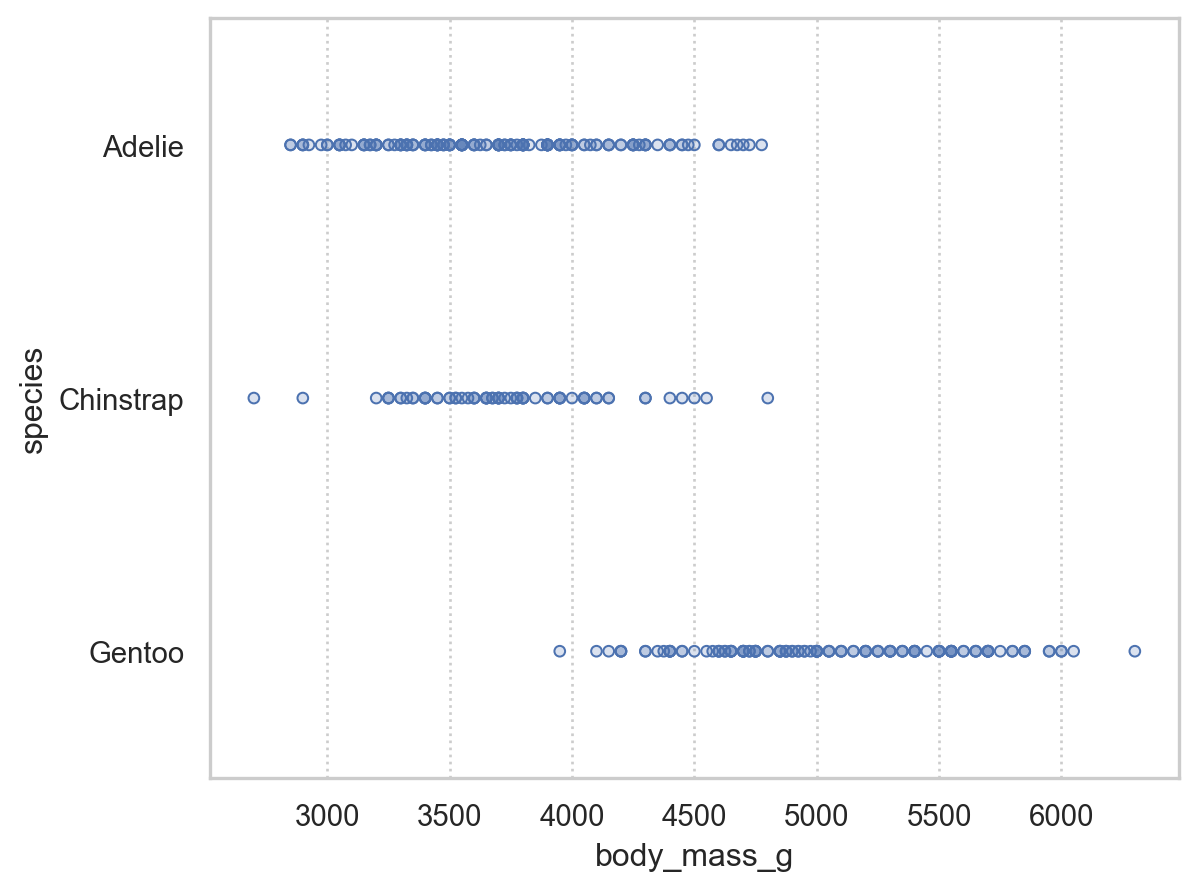

In [87]:
from seaborn import axes_style
so.Plot(penguins, x='body_mass_g', y='species')
.theme({**axes_style('whitegrid'), 'grid.linestyle' : ':'})
.